In [1]:
import numpy as np
import pandas as pd
import math
import itertools 

import matplotlib.pyplot as plt
import seaborn as sns

from dateutil import parser
from datetime import datetime, timedelta, date
import holidays

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(font="Arial",
        rc={
 "axes.axisbelow": False,
 "axes.edgecolor": "lightgrey",
 "axes.facecolor": "None",
 "axes.grid": False,
 "axes.labelcolor": "dimgrey",
 "axes.spines.right": False,
 "axes.spines.top": False,
 "figure.facecolor": "white",
 "lines.solid_capstyle": "round",
 "patch.edgecolor": "w",
 "patch.force_edgecolor": True,
 "text.color": "dimgrey",
 "xtick.bottom": False,
 "xtick.color": "dimgrey",
 "xtick.direction": "out",
 "xtick.top": False,
 "ytick.color": "dimgrey",
 "ytick.direction": "out",
 "ytick.left": False,
 "ytick.right": False})

In [3]:
df = pd.read_csv(r"C:\Users\karat\Downloads\sales.csv.csv")
df.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE   0.00            0
1   1  2013-01-01          1   BABY CARE   0.00            0
2   2  2013-01-01          1      BEAUTY   0.00            0
3   3  2013-01-01          1   BEVERAGES   0.00            0
4   4  2013-01-01          1       BOOKS   0.00            0

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df['date'] = pd.to_datetime(df['date'])
min(df['date']), max(df['date'])

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [5]:
df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [6]:
df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [7]:
agg_df = df.groupby(['date','family']).agg({'sales':'sum'}).reset_index().sort_values(by=['family','date'])

In [8]:
agg_df.head(10)

date      family  sales
0   2013-01-01  AUTOMOTIVE   0.00
33  2013-01-02  AUTOMOTIVE 255.00
66  2013-01-03  AUTOMOTIVE 161.00
99  2013-01-04  AUTOMOTIVE 169.00
132 2013-01-05  AUTOMOTIVE 342.00
165 2013-01-06  AUTOMOTIVE 360.00
198 2013-01-07  AUTOMOTIVE 189.00
231 2013-01-08  AUTOMOTIVE 229.00
264 2013-01-09  AUTOMOTIVE 164.00
297 2013-01-10  AUTOMOTIVE 164.00

In [9]:
total_sales_df = agg_df.pivot(index='date',columns='family', values='sales')
total_sales_df.head()

family      AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  BREAD/BAKERY  \
date                                                                        
2013-01-01        0.00       0.00    2.00     810.00   0.00        180.59   
2013-01-02      255.00       0.00  207.00   72092.00   0.00      26246.32   
2013-01-03      161.00       0.00  125.00   52105.00   0.00      18456.48   
2013-01-04      169.00       0.00  133.00   54167.00   0.00      16721.97   
2013-01-05      342.00       0.00  191.00   77818.00   0.00      22367.76   

family      CELEBRATION  CLEANING    DAIRY     DELI     EGGS  FROZEN FOODS  \
date                                                                         
2013-01-01         0.00    186.00   143.00    71.09    46.00         29.65   
2013-01-02         0.00  74629.00 23381.00 15754.50 10932.00       7115.39   
2013-01-03         0.00  55893.00 18001.00 11172.45  7358.00       4760.81   
2013-01-04         0.00  52064.00 18148.00 10143.21  6760.00       4525.93   
2013-01-05         0.00  70128.00 23082.00 13734.95  8576.00       5781.61   

family      GROCERY I  GROCERY II  HARDWARE  HOME AND KITCHEN I  \
date                                                              
2013-01-01     700.00       15.00      0.00                0.00   
2013-01-02  202020.00     1476.00     46.00                0.00   
2013-01-03  144878.00     1048.00     37.00                0.00   
2013-01-04  135754.00     1031.00     57.00                0.00   
2013-01-05  188356.00     1273.00     87.00                0.00   

family      HOME AND KITCHEN II  HOME APPLIANCES  HOME CARE  LADIESWEAR  \
date                                                                      
2013-01-01                 0.00             0.00       0.00        0.00   
2013-01-02                 0.00            21.00       0.00        0.00   
2013-01-03                 0.00            15.00       0.00        0.00   
2013-01-04                 0.00            13.00       0.00        0.00   
2013-01-05                 0.00            11.00       0.00        0.00   

family      LAWN AND GARDEN  LINGERIE  LIQUOR,WINE,BEER  MAGAZINES    MEATS  \
date                                                                          
2013-01-01             2.00      5.00            105.00       0.00   110.80   
2013-01-02           121.00    469.00           2411.00       0.00 20871.46   
2013-01-03            83.00    366.00           2476.00       0.00 16597.40   
2013-01-04           127.00    382.00           4796.00       0.00 21625.96   
2013-01-05           180.00    458.00           6715.00       0.00 20879.09   

family      PERSONAL CARE  PET SUPPLIES  PLAYERS AND ELECTRONICS  POULTRY  \
date                                                                        
2013-01-01          25.00          0.00                     0.00    42.64   
2013-01-02       17204.00          0.00                     0.00 13975.88   
2013-01-03       12568.00          0.00                     0.00 10674.39   
2013-01-04       11303.00          0.00                     0.00 10772.52   
2013-01-05       16819.00          0.00                     0.00 13475.01   

family      PREPARED FOODS  PRODUCE  SCHOOL AND OFFICE SUPPLIES  SEAFOOD  
date                                                                      
2013-01-01           37.85     0.00                        0.00     0.00  
2013-01-02         5338.11     0.00                        0.00  1526.75  
2013-01-03         3591.39     0.00                        0.00  1094.31  
2013-01-04         4472.97     0.00                        0.00  1293.12  
2013-01-05         5830.07     0.00                        0.00  1245.64

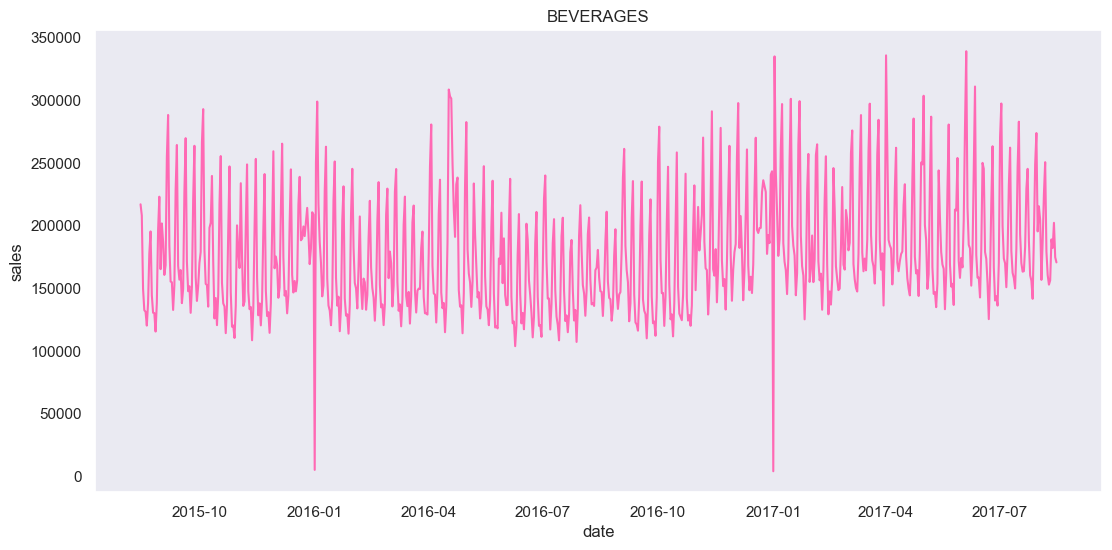

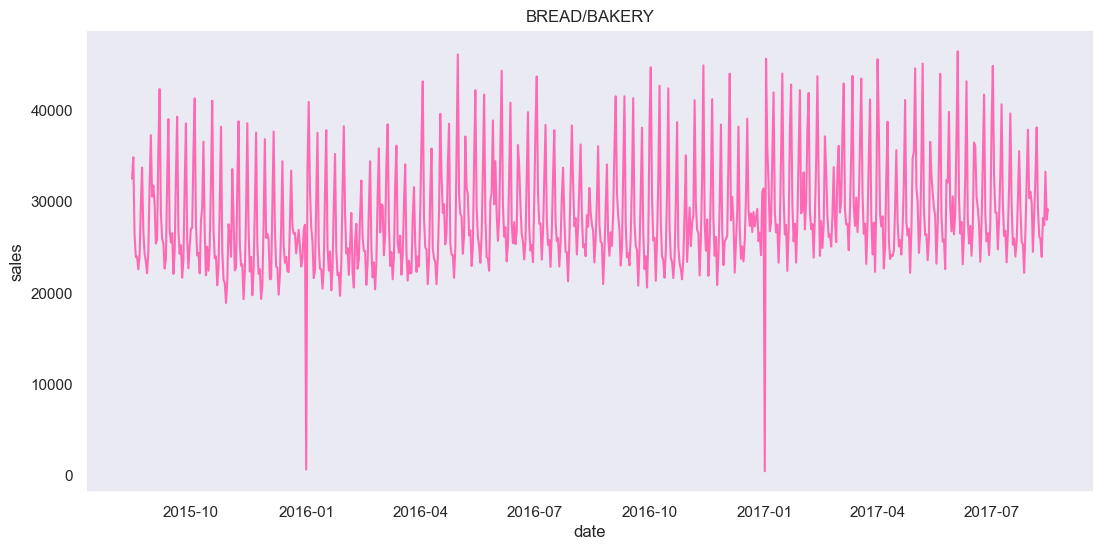

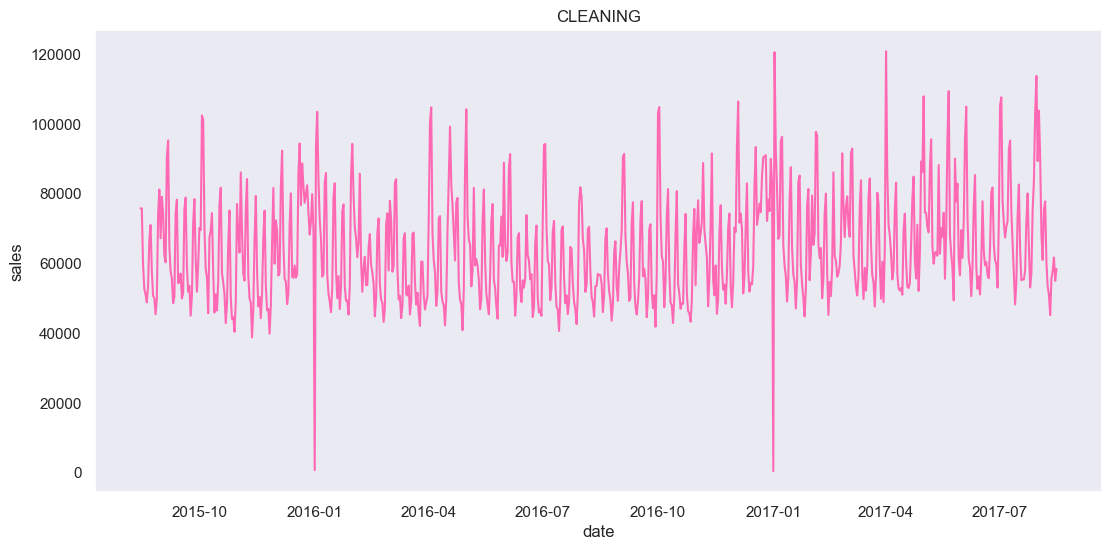

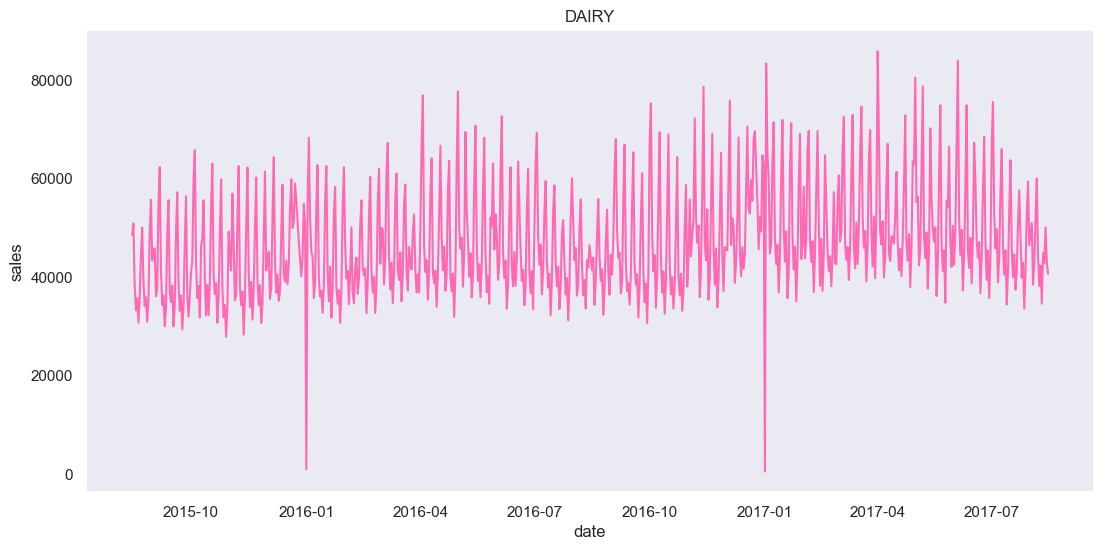

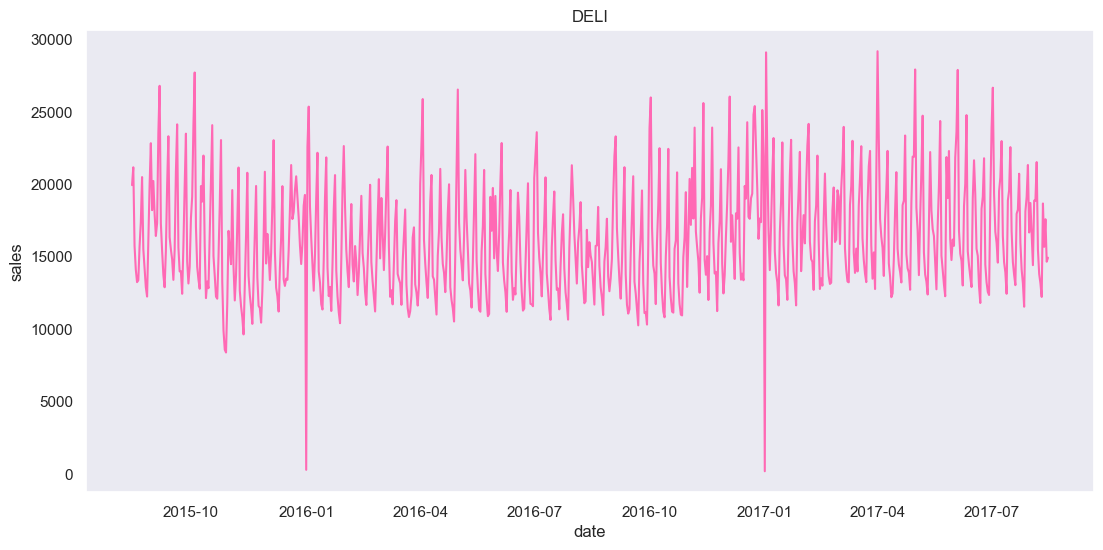

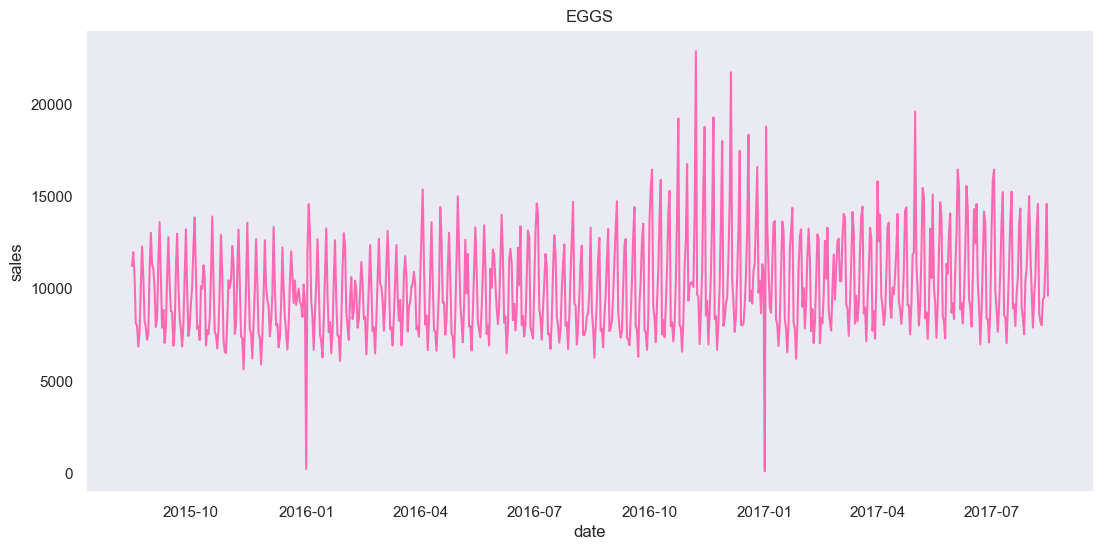

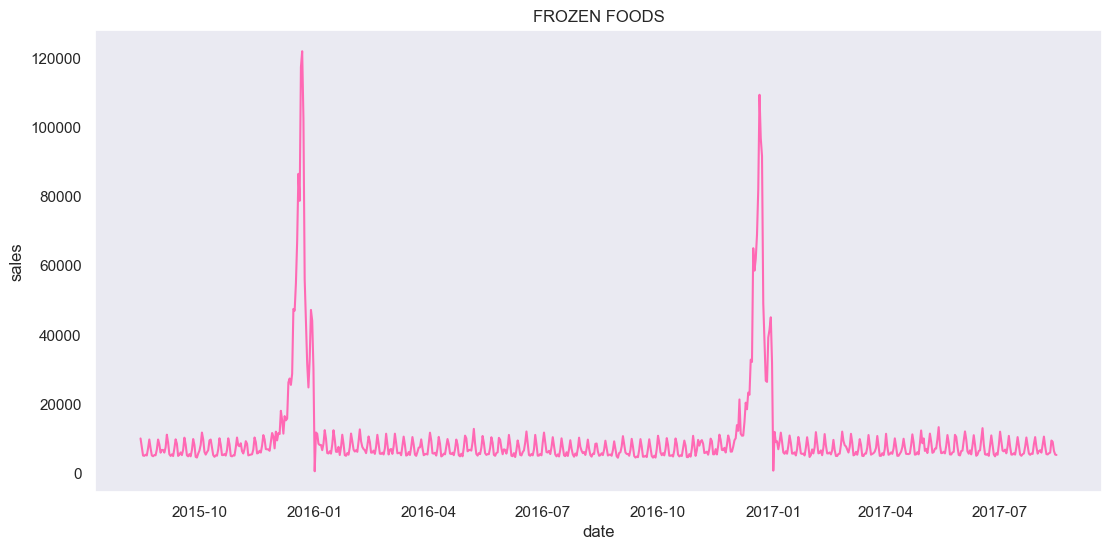

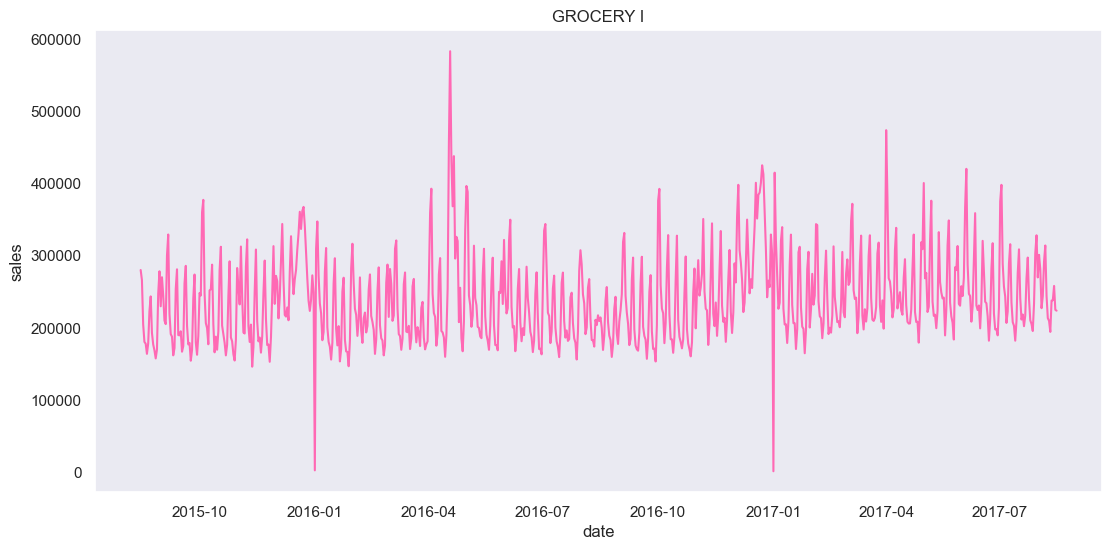

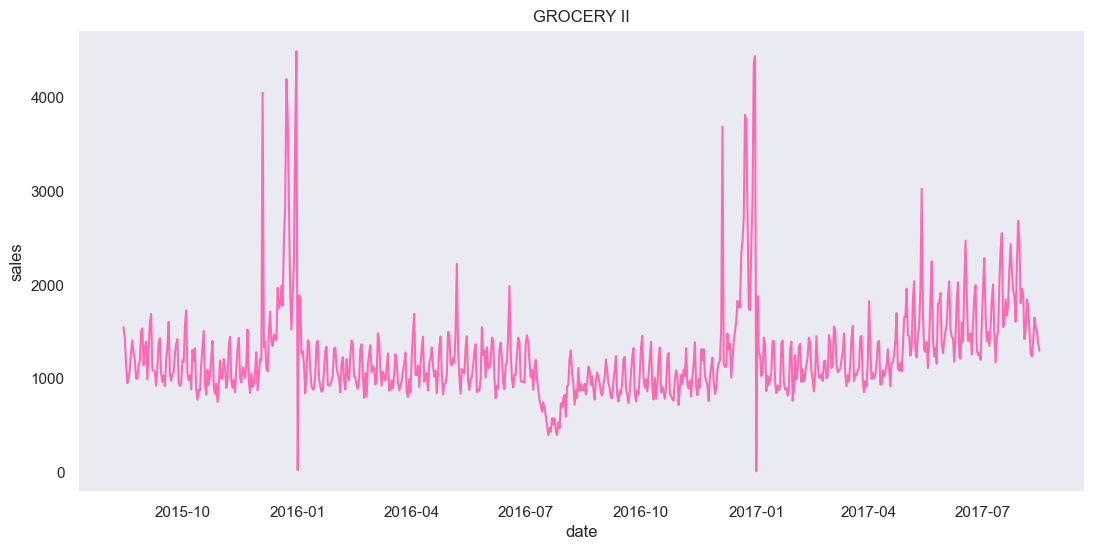

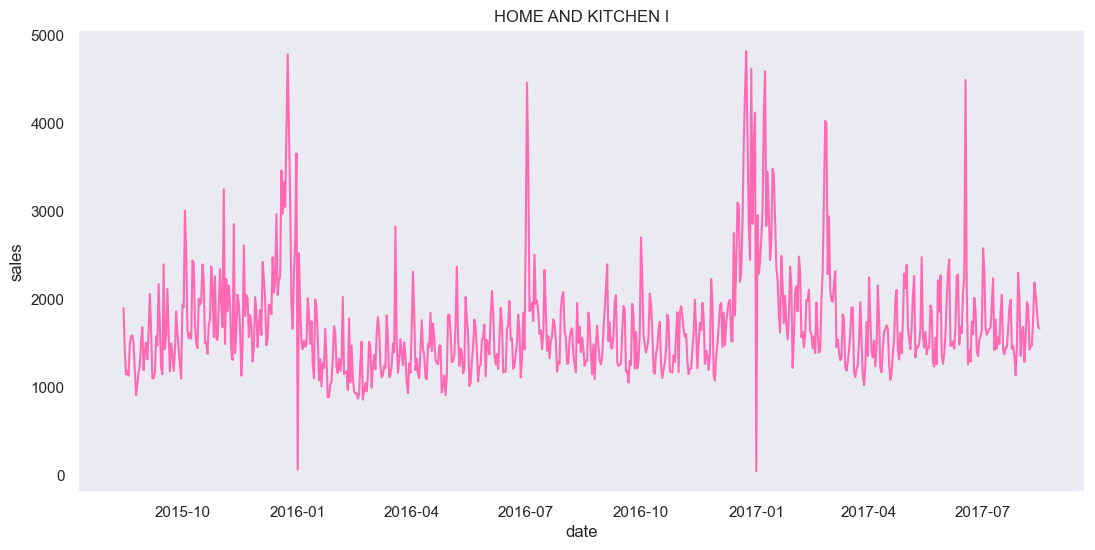

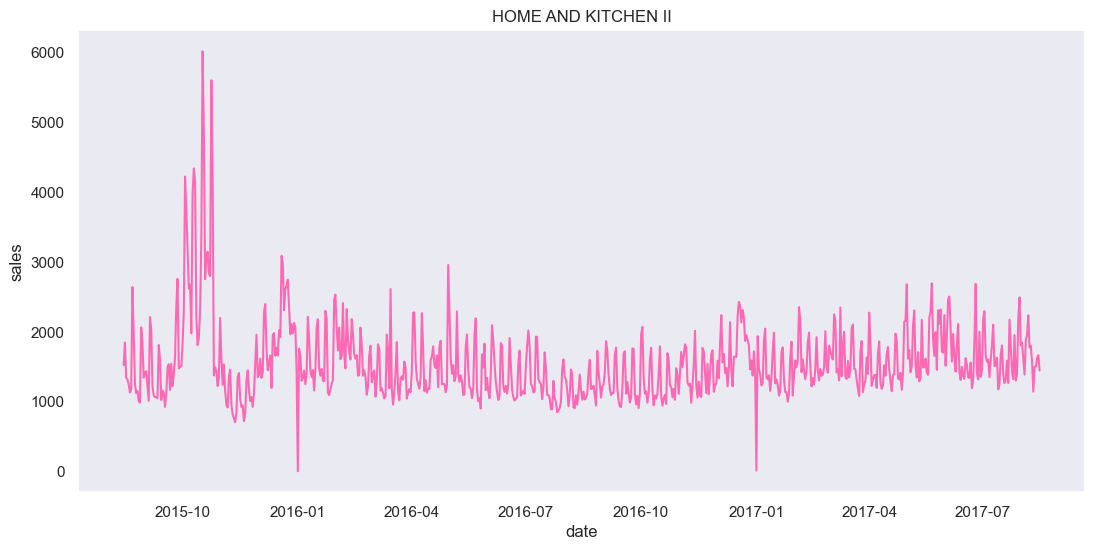

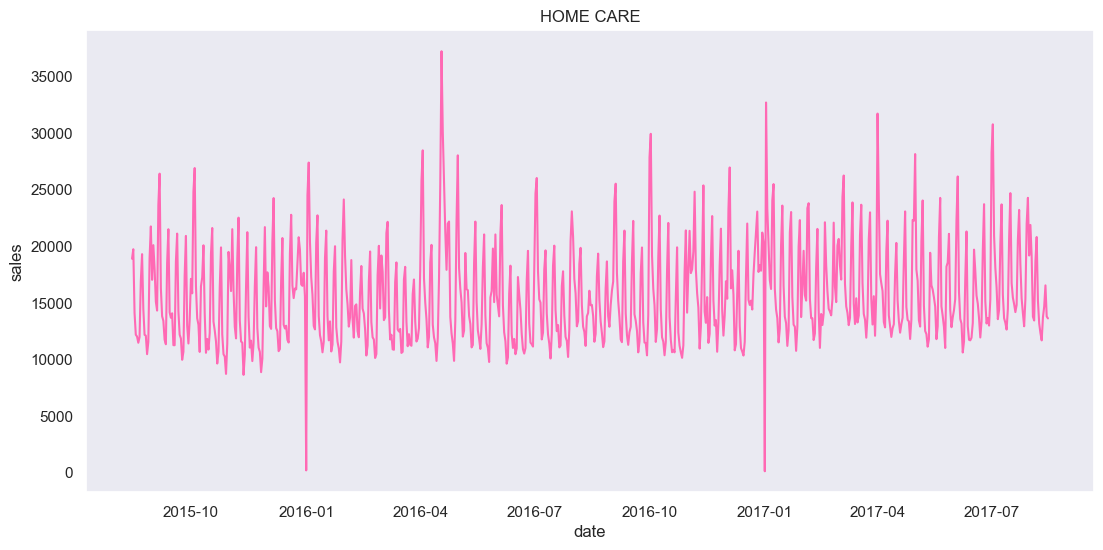

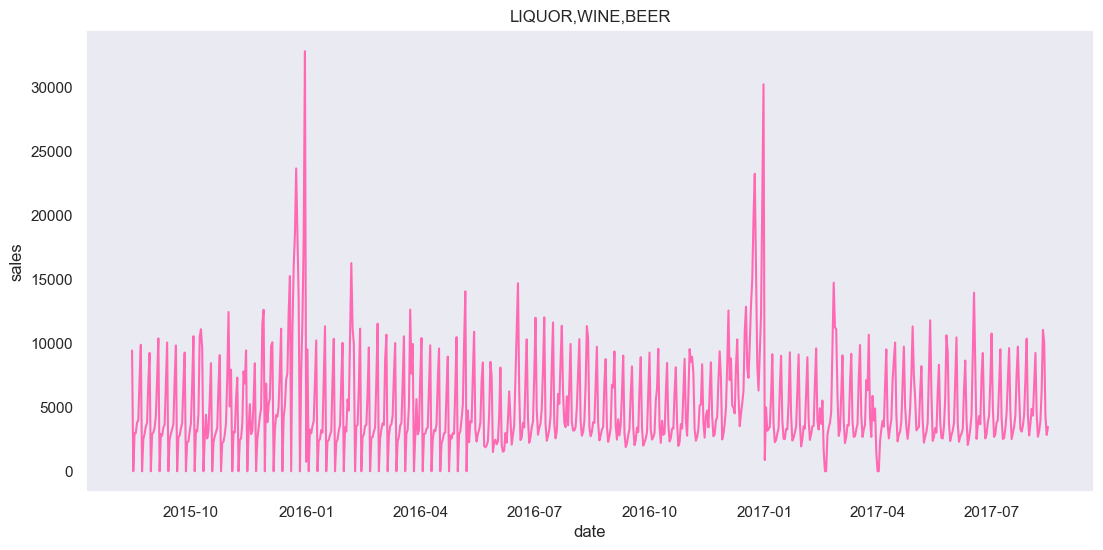

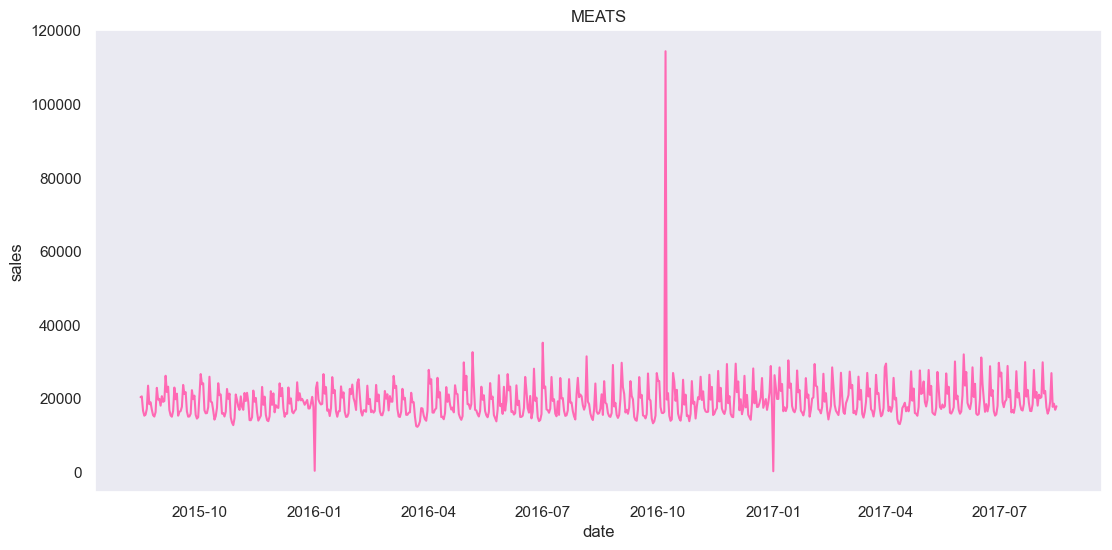

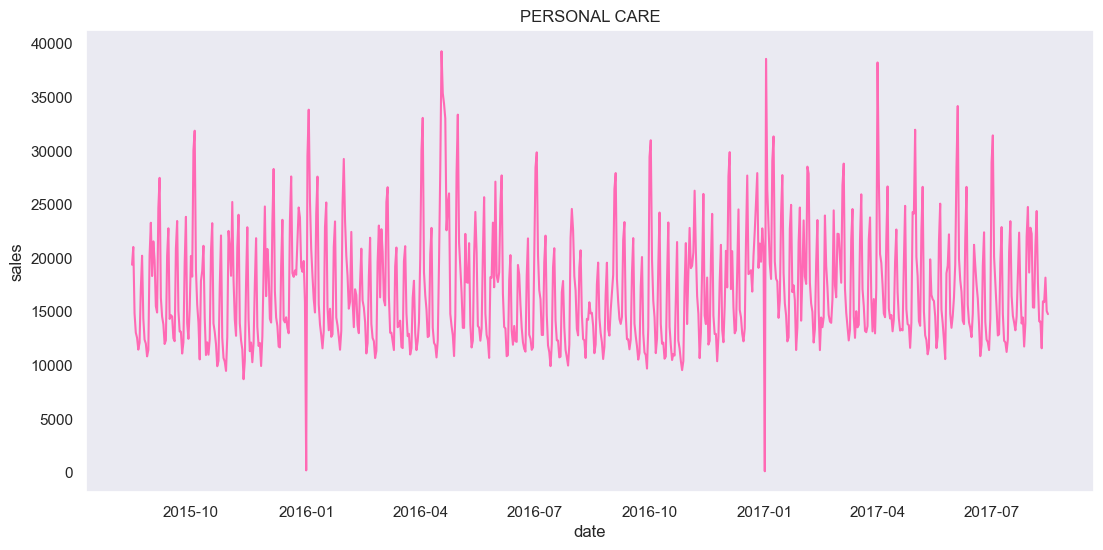

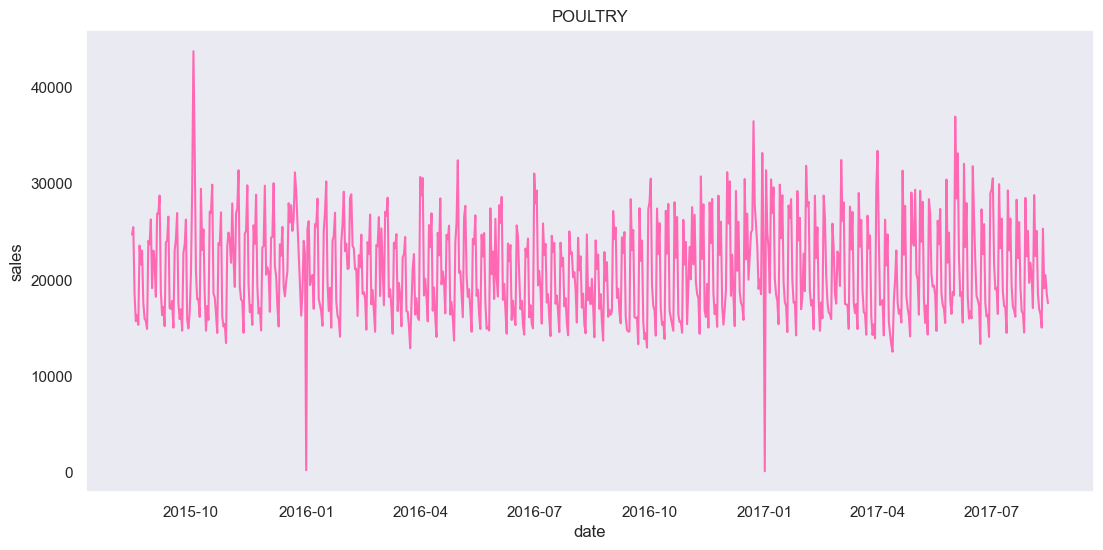

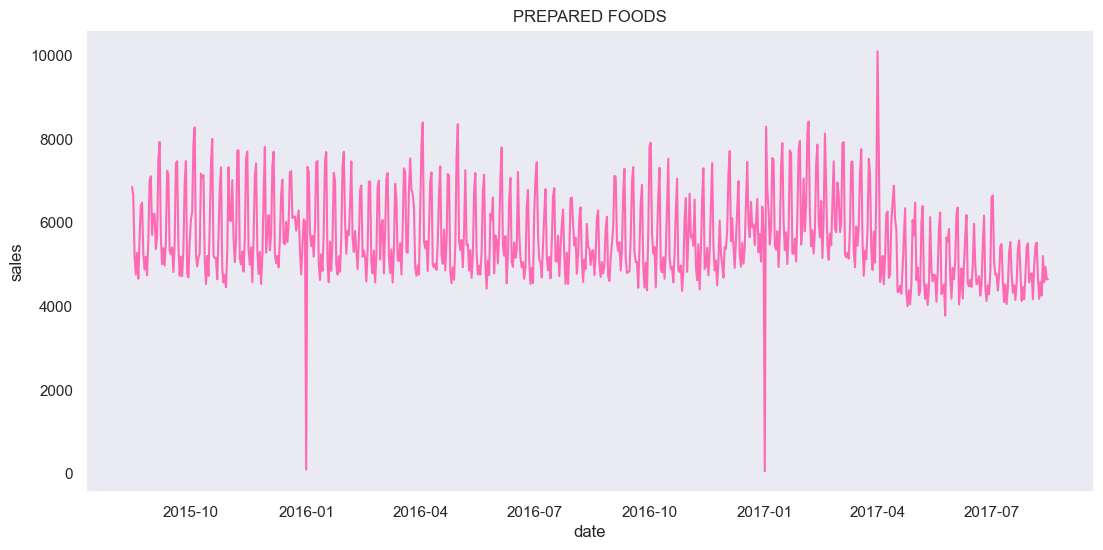

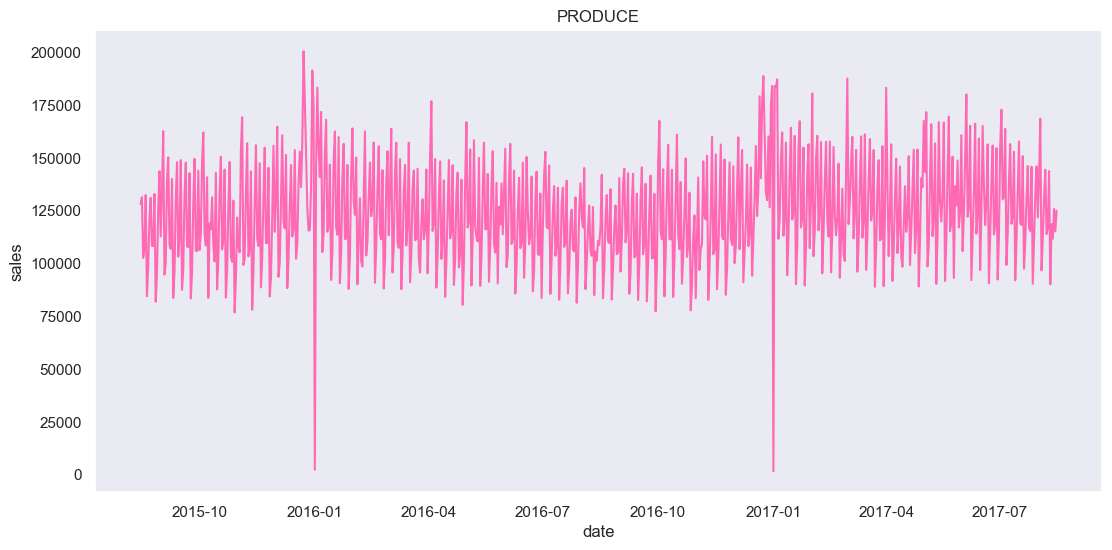

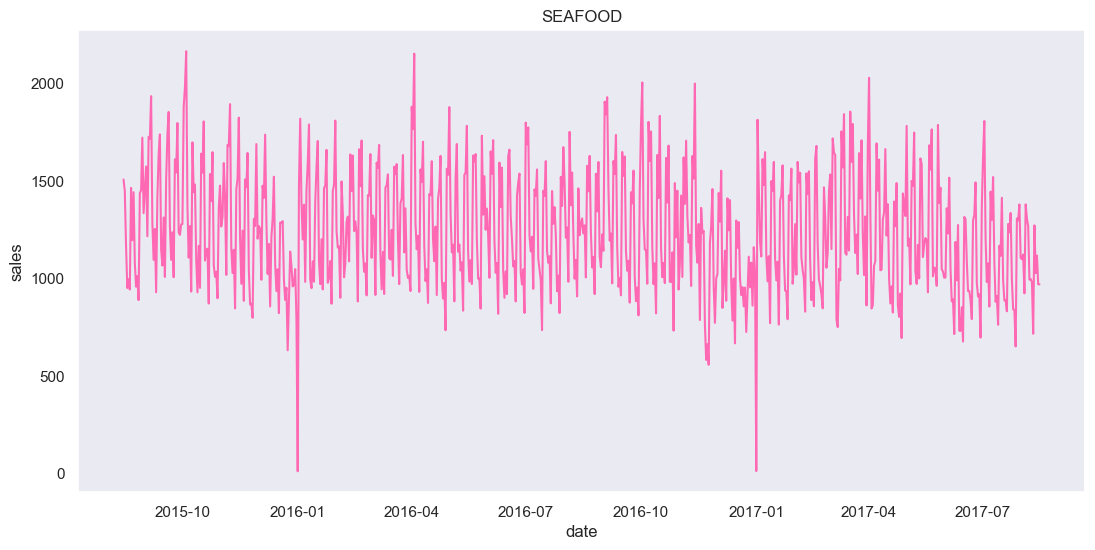

In [35]:
sns.set_theme(style="dark")

for column in total_sales_df.columns:
    plt.figure(figsize=(13, 6))
    sns.lineplot(data=total_sales_df, x=total_sales_df.index, y=column, color='hotpink')

    plt.ylabel('sales')
    plt.title(column)
    plt.show()

In [11]:
def missing_data(input_data):
    
    total = input_data.isnull().sum()
    percent = (input_data.isnull().sum()/input_data.isnull().count()*100)
    table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    types = []
    for col in input_data.columns: 
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table["Types"] = types
    return(pd.DataFrame(table))

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:
total_sales_df = total_sales_df[total_sales_df.index>='2015-08-15']

In [13]:
missing_data(total_sales_df)

Total  Percent    Types
family                                             
AUTOMOTIVE                      0     0.00  float64
BABY CARE                       0     0.00  float64
BEAUTY                          0     0.00  float64
BEVERAGES                       0     0.00  float64
BOOKS                           0     0.00  float64
BREAD/BAKERY                    0     0.00  float64
CELEBRATION                     0     0.00  float64
CLEANING                        0     0.00  float64
DAIRY                           0     0.00  float64
DELI                            0     0.00  float64
EGGS                            0     0.00  float64
FROZEN FOODS                    0     0.00  float64
GROCERY I                       0     0.00  float64
GROCERY II                      0     0.00  float64
HARDWARE                        0     0.00  float64
HOME AND KITCHEN I              0     0.00  float64
HOME AND KITCHEN II             0     0.00  float64
HOME APPLIANCES                 0     0.00  float64
HOME CARE                       0     0.00  float64
LADIESWEAR                      0     0.00  float64
LAWN AND GARDEN                 0     0.00  float64
LINGERIE                        0     0.00  float64
LIQUOR,WINE,BEER                0     0.00  float64
MAGAZINES                       0     0.00  float64
MEATS                           0     0.00  float64
PERSONAL CARE                   0     0.00  float64
PET SUPPLIES                    0     0.00  float64
PLAYERS AND ELECTRONICS         0     0.00  float64
POULTRY                         0     0.00  float64
PREPARED FOODS                  0     0.00  float64
PRODUCE                         0     0.00  float64
SCHOOL AND OFFICE SUPPLIES      0     0.00  float64
SEAFOOD                         0     0.00  float64

In [14]:
old_len = len(total_sales_df.columns)

#Keep categories with avg daily sales greater than $1000
total_sales_df = total_sales_df[total_sales_df.columns[total_sales_df.apply(np.mean,axis='rows') > 1000]]

print("Dropping "+ str(old_len-len(total_sales_df.columns))+" columns due to insufficient data volume.")

Dropping 14 columns due to insufficient data volume.


In [15]:
from scipy import stats

In [16]:
prediction_df_list = []

#Cleaning up dataframe using z-score to remove outliers which heavily bias the model
for column in total_sales_df.columns:
    df_clean = total_sales_df[[column]].reset_index()
    
    z = np.abs(stats.zscore(df_clean[column]))
    outlier_index = np.where(z > 2.7)[0] #As 99.7% of the data points lie between 3 standard deviations (Gaussian Distribution)
    print("Dropping "+str(len(outlier_index))+" rows for following category: "+column)
    df_clean.drop(index=outlier_index,inplace=True)
    df_clean.set_index('date', inplace=True)
    prediction_df_list.append(df_clean)

Dropping 7 rows for following category: BEVERAGES
Dropping 11 rows for following category: BREAD/BAKERY
Dropping 10 rows for following category: CLEANING
Dropping 10 rows for following category: DAIRY
Dropping 9 rows for following category: DELI
Dropping 12 rows for following category: EGGS
Dropping 22 rows for following category: FROZEN FOODS
Dropping 11 rows for following category: GROCERY I
Dropping 15 rows for following category: GROCERY II
Dropping 23 rows for following category: HOME AND KITCHEN I
Dropping 15 rows for following category: HOME AND KITCHEN II
Dropping 13 rows for following category: HOME CARE
Dropping 11 rows for following category: LIQUOR,WINE,BEER
Dropping 4 rows for following category: MEATS
Dropping 14 rows for following category: PERSONAL CARE
Dropping 5 rows for following category: POULTRY
Dropping 3 rows for following category: PREPARED FOODS
Dropping 4 rows for following category: PRODUCE
Dropping 4 rows for following category: SEAFOOD


In [17]:
for i in range(5):
    print(prediction_df_list[i].head())

family      BEVERAGES
date                 
2015-08-15  217135.00
2015-08-16  208213.00
2015-08-17  149741.00
2015-08-18  132609.00
2015-08-19  131368.00
family      BREAD/BAKERY
date                    
2015-08-15      32509.91
2015-08-16      34851.88
2015-08-17      26361.77
2015-08-18      23915.95
2015-08-19      23995.15
family      CLEANING
date                
2015-08-15  75837.00
2015-08-16  75824.00
2015-08-17  59718.00
2015-08-18  52749.00
2015-08-19  51157.00
family        DAIRY
date               
2015-08-15 48578.00
2015-08-16 50930.00
2015-08-17 38358.00
2015-08-18 33273.00
2015-08-19 35760.00
family         DELI
date               
2015-08-15 19946.92
2015-08-16 21178.46
2015-08-17 15755.02
2015-08-18 14119.25
2015-08-19 13250.04


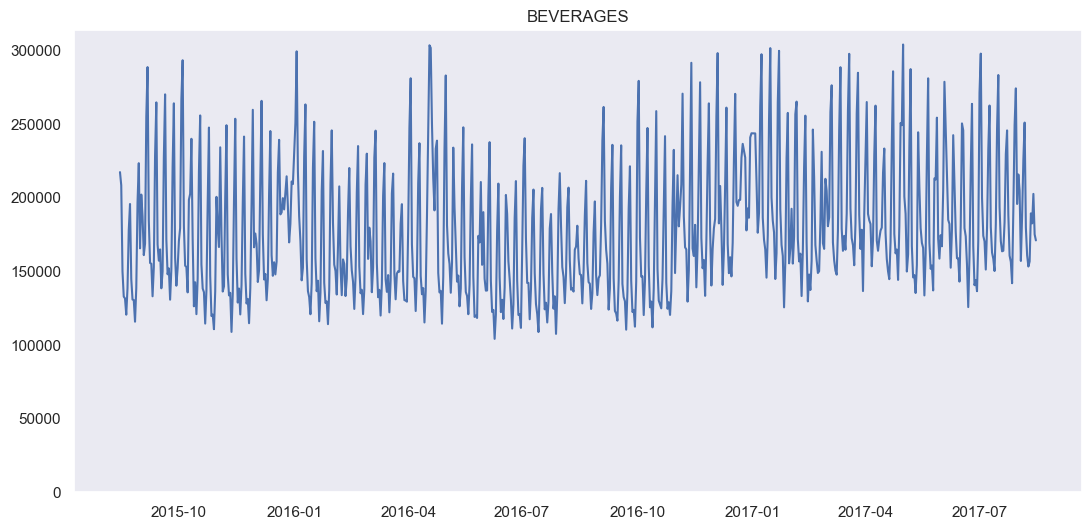

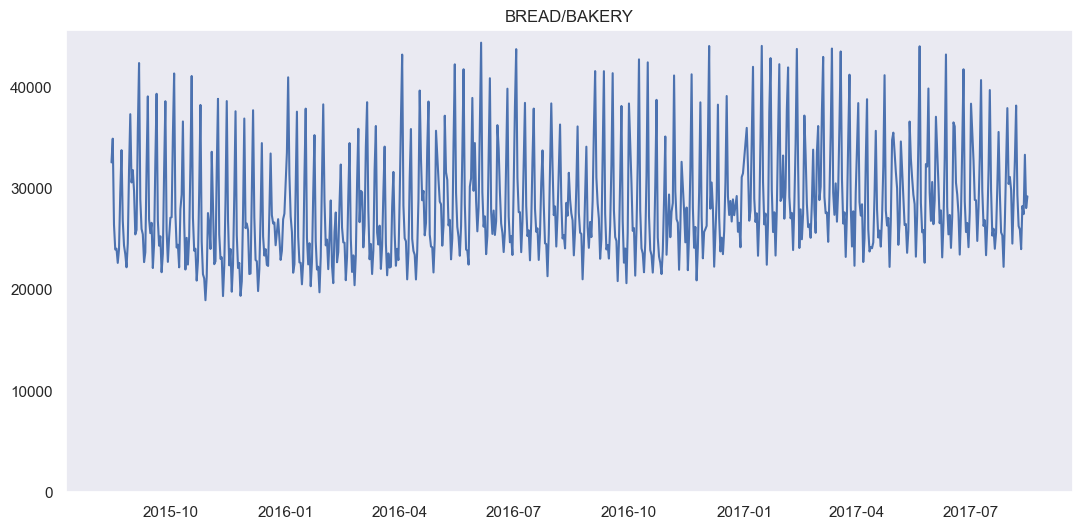

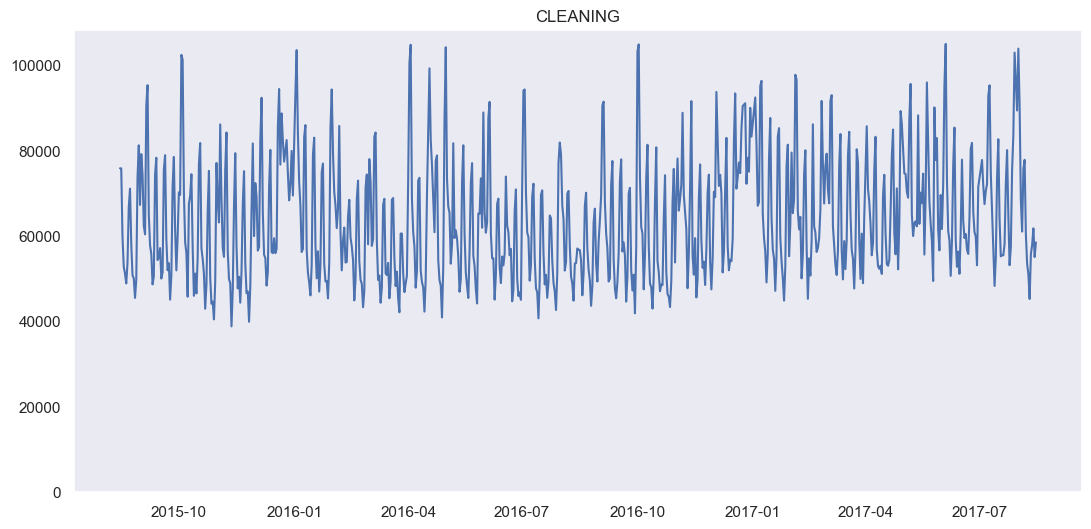

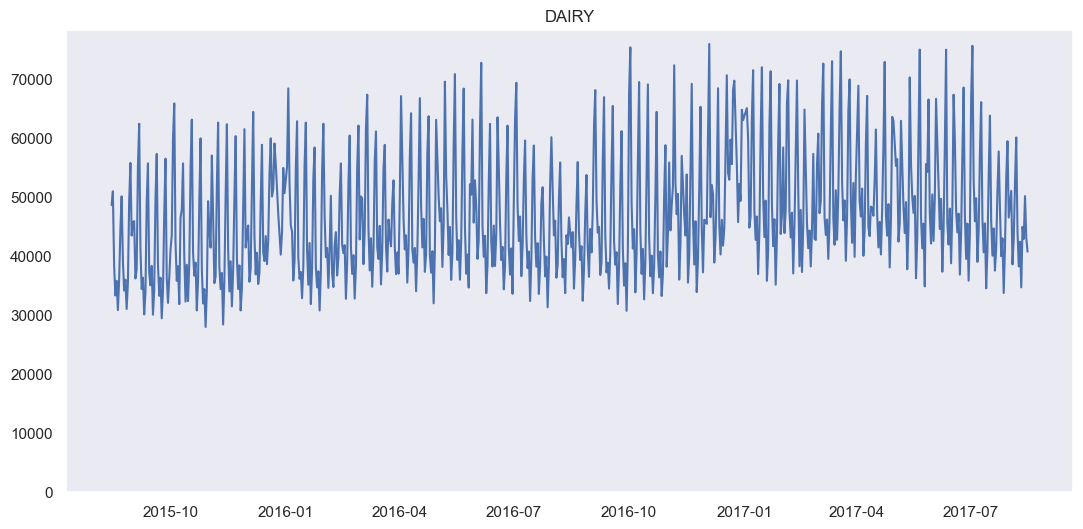

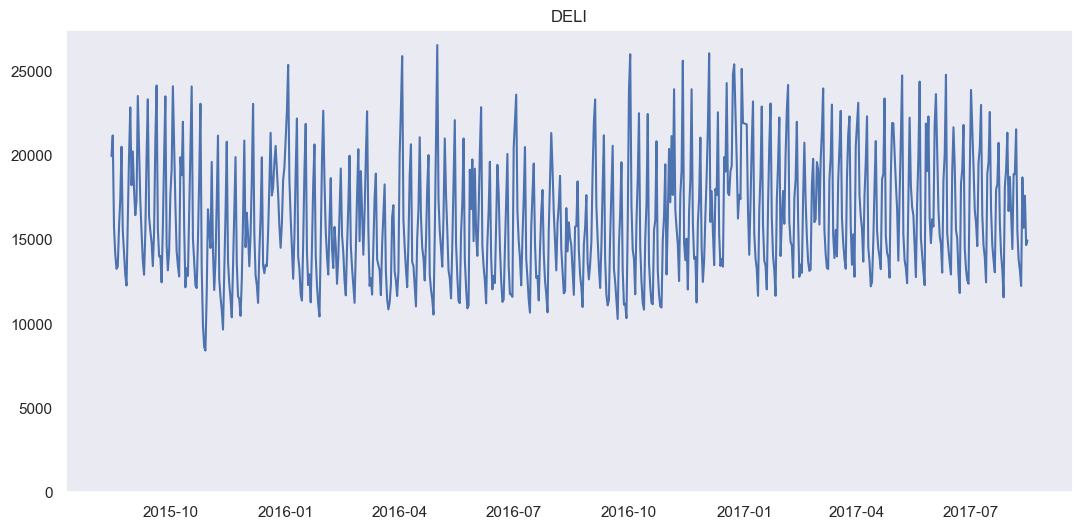

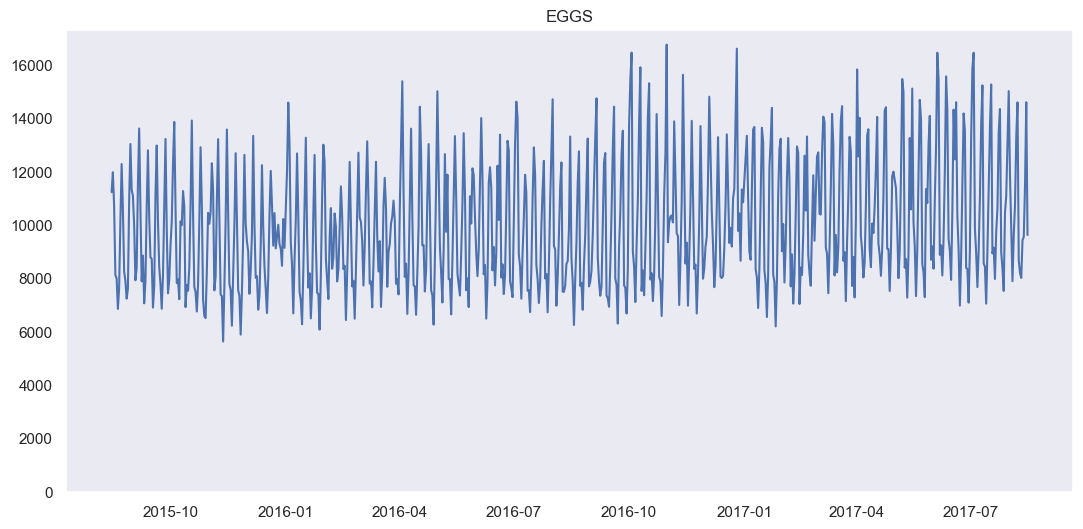

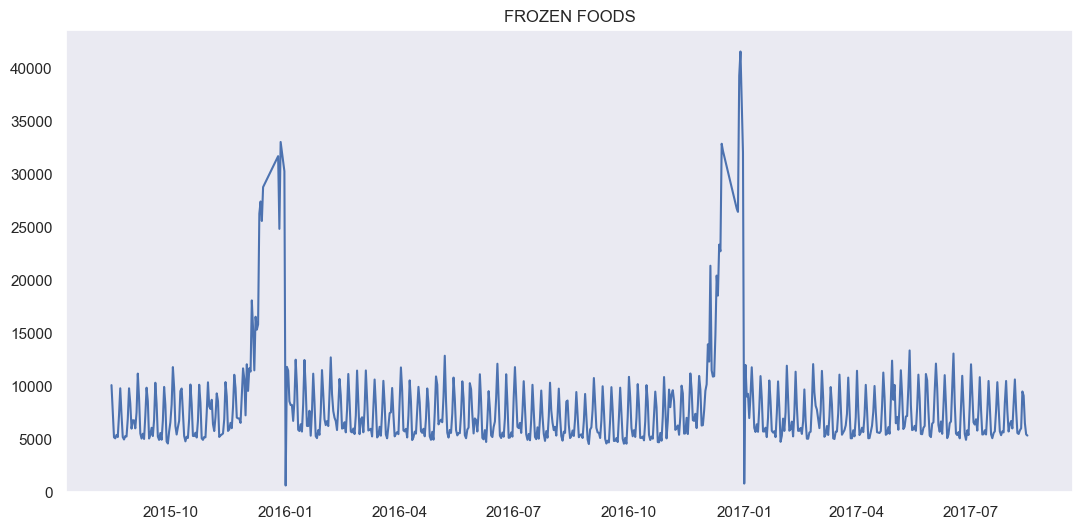

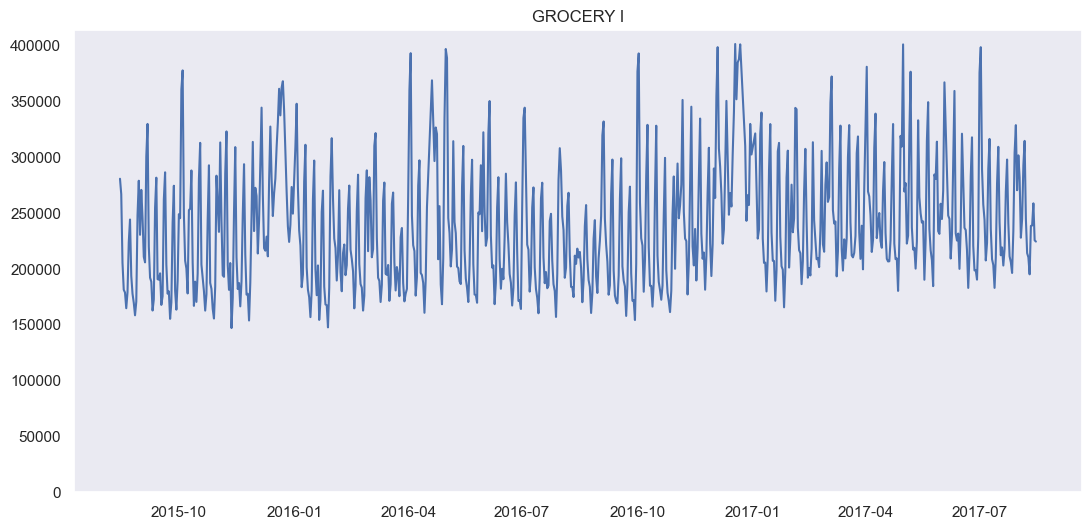

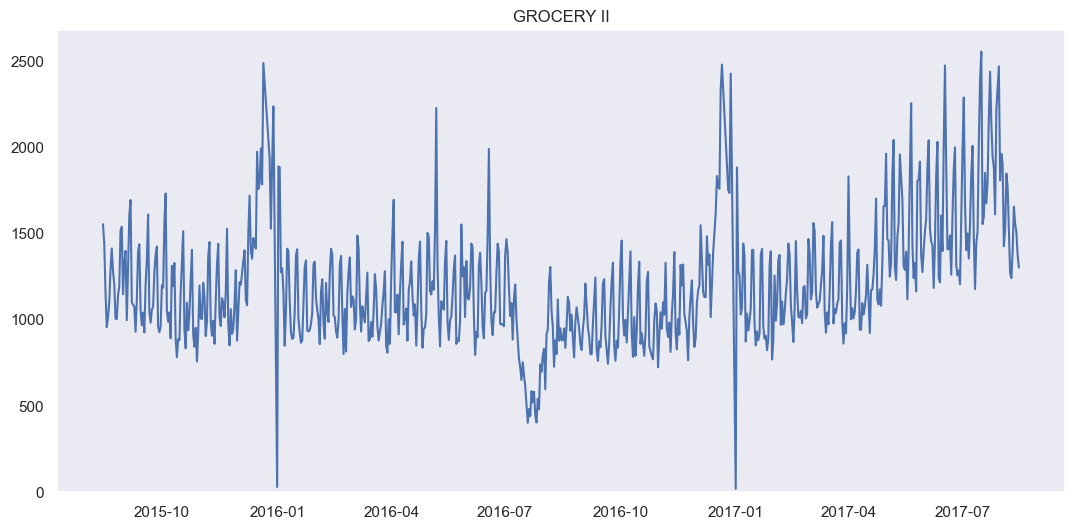

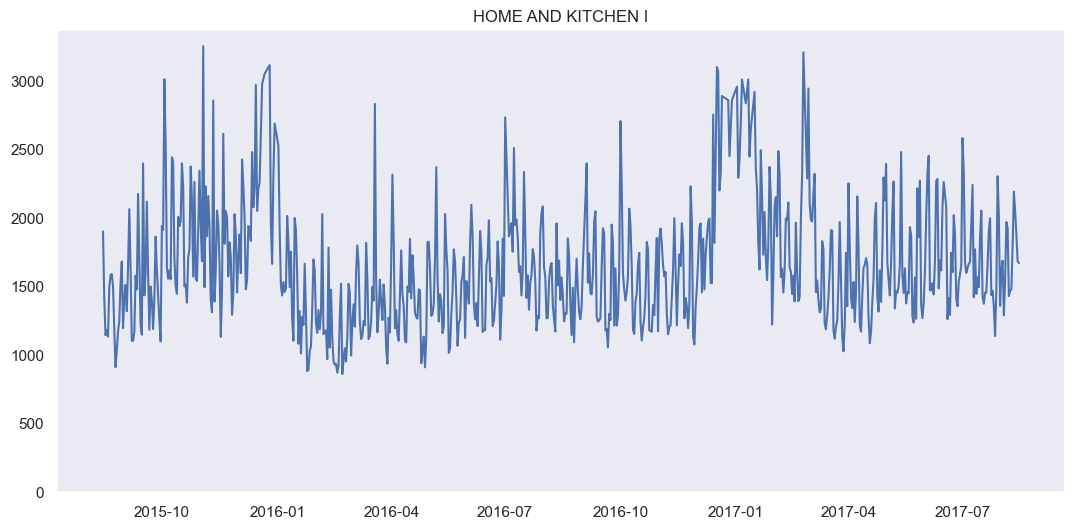

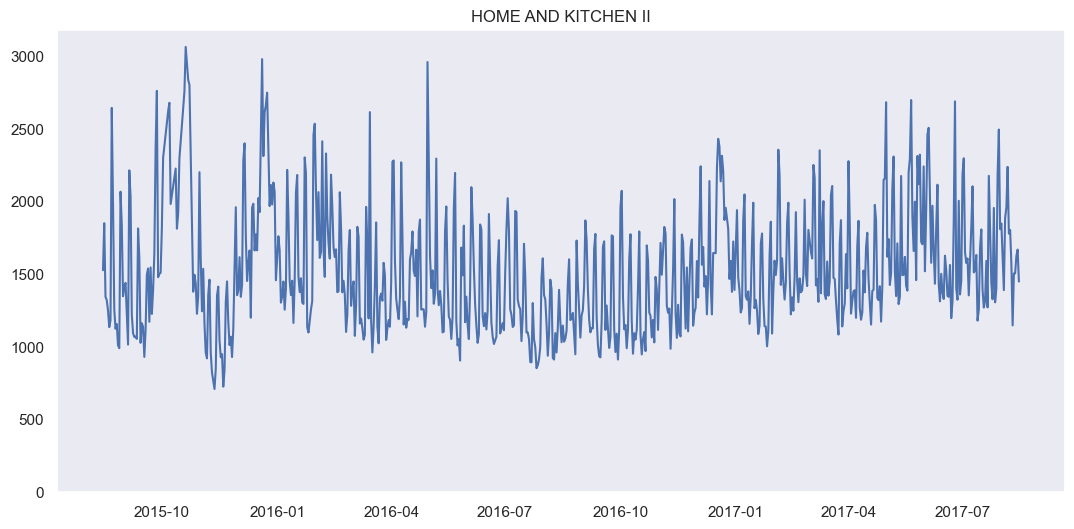

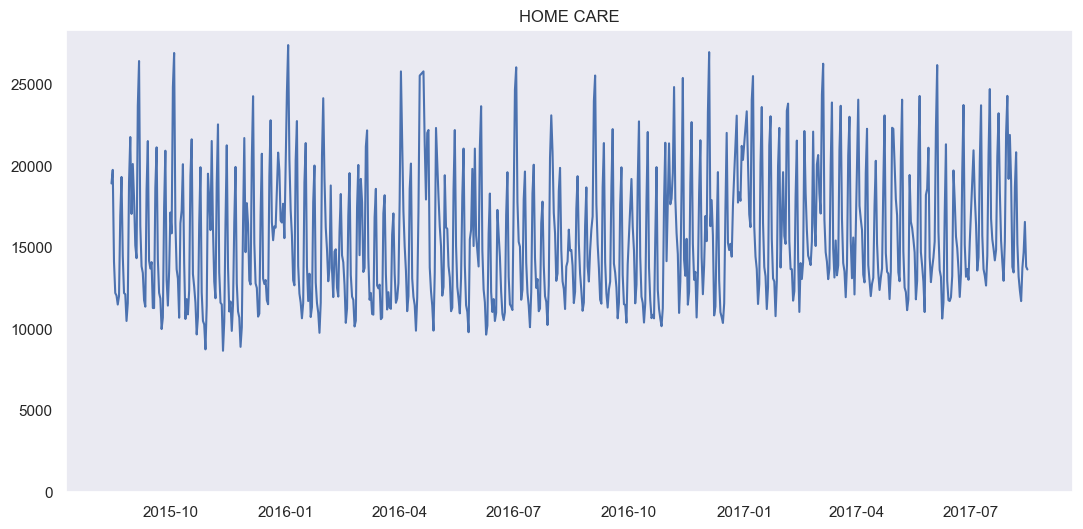

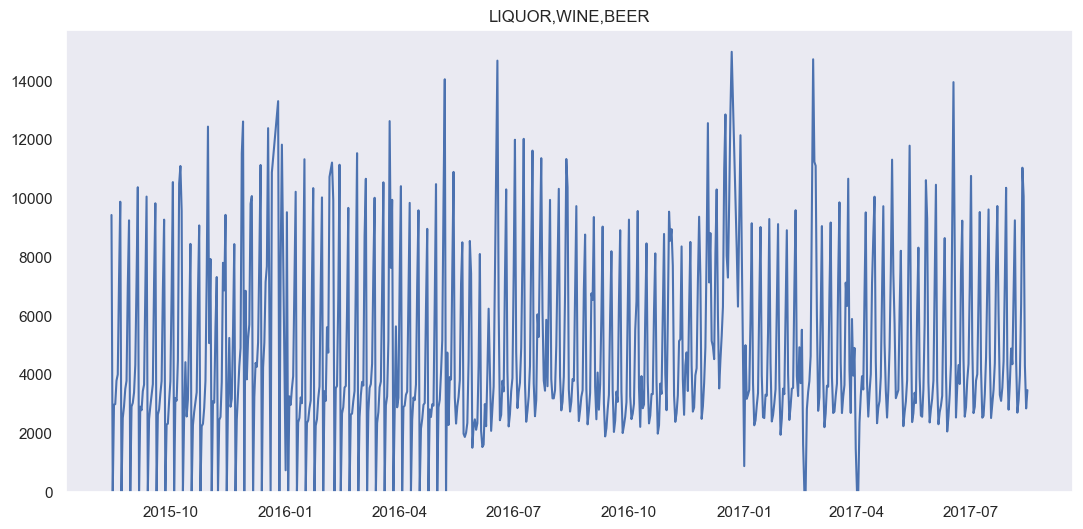

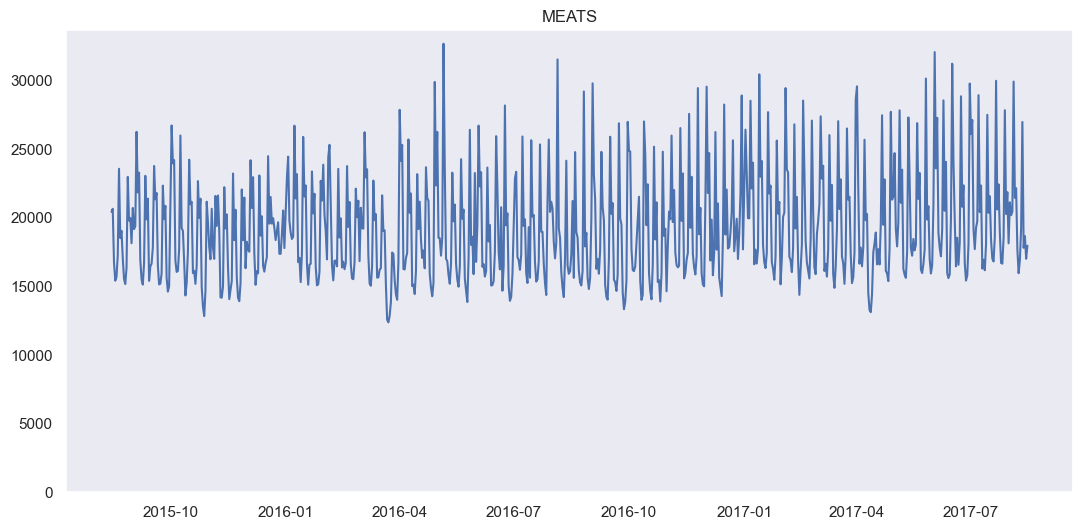

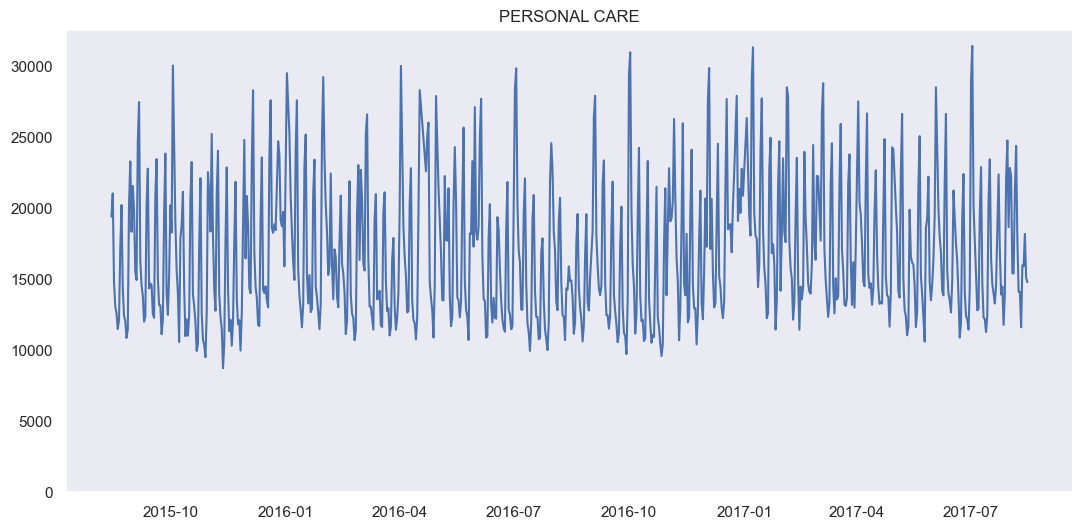

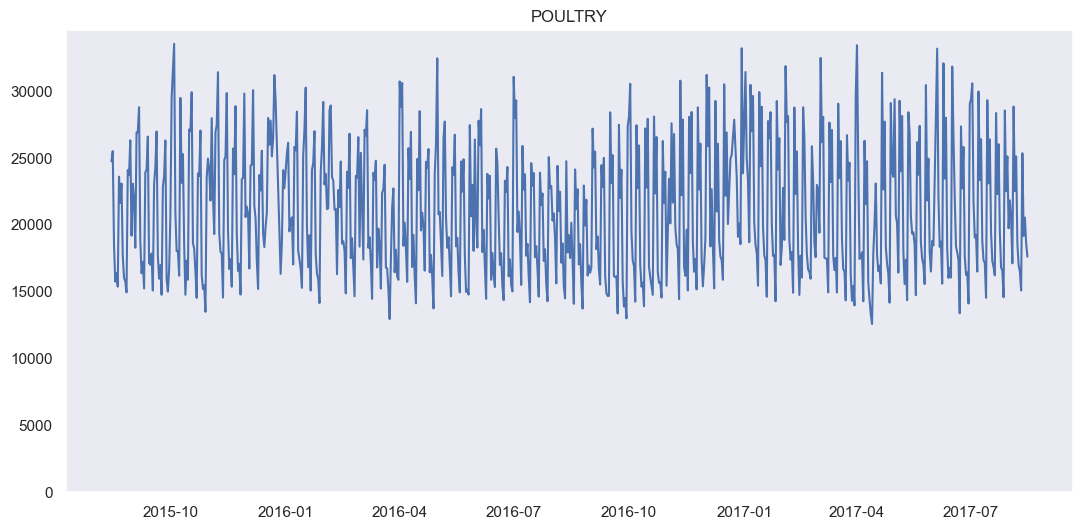

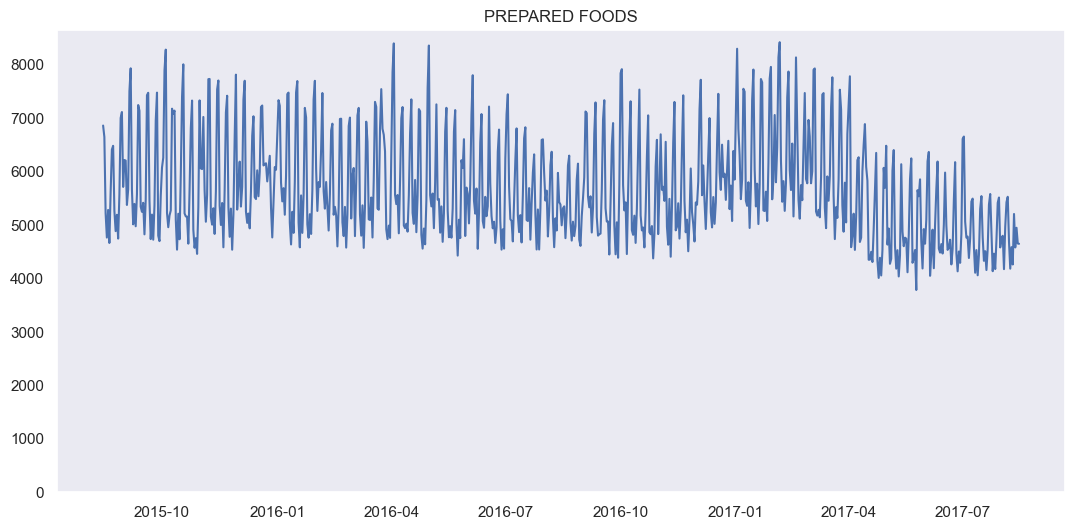

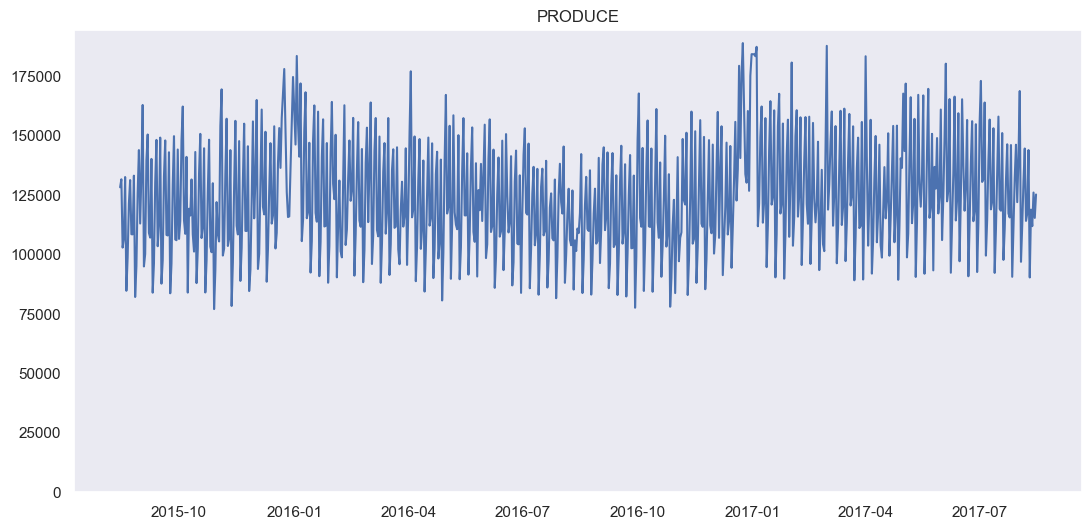

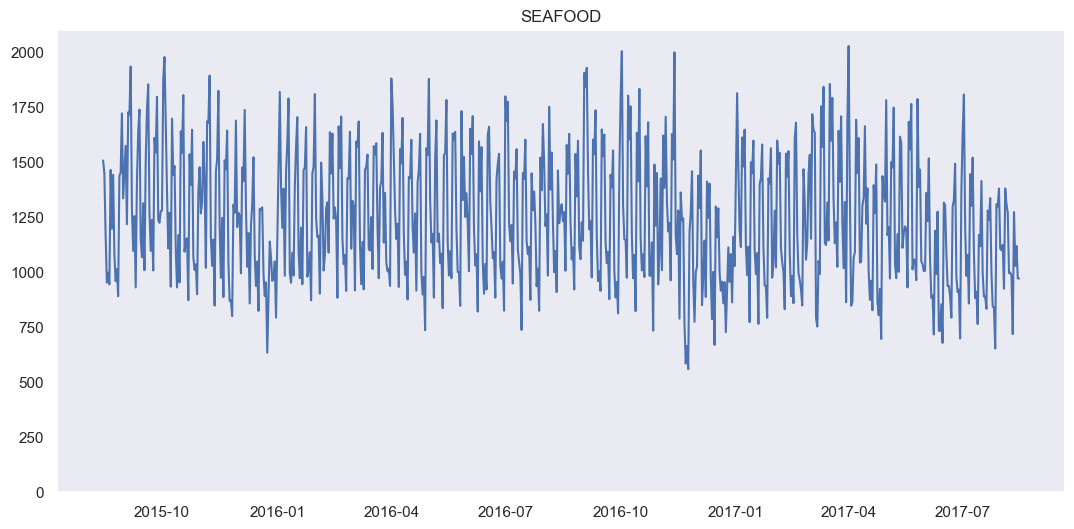

In [18]:
for i in range(len(prediction_df_list)):
    plt.figure(figsize=(13, 6))
    plt.plot(prediction_df_list[i])
    plt.title(prediction_df_list[i].columns[0])
    plt.ylim(ymin=0)
    plt.show()

In [19]:
#lets break it down by thirds for low, mid, high
avg_daily_sales = total_sales_df.apply(np.mean, axis=0).sort_values()
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])
low_vol_columns = avg_daily_sales[avg_daily_sales<=low].index.tolist()
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid].index

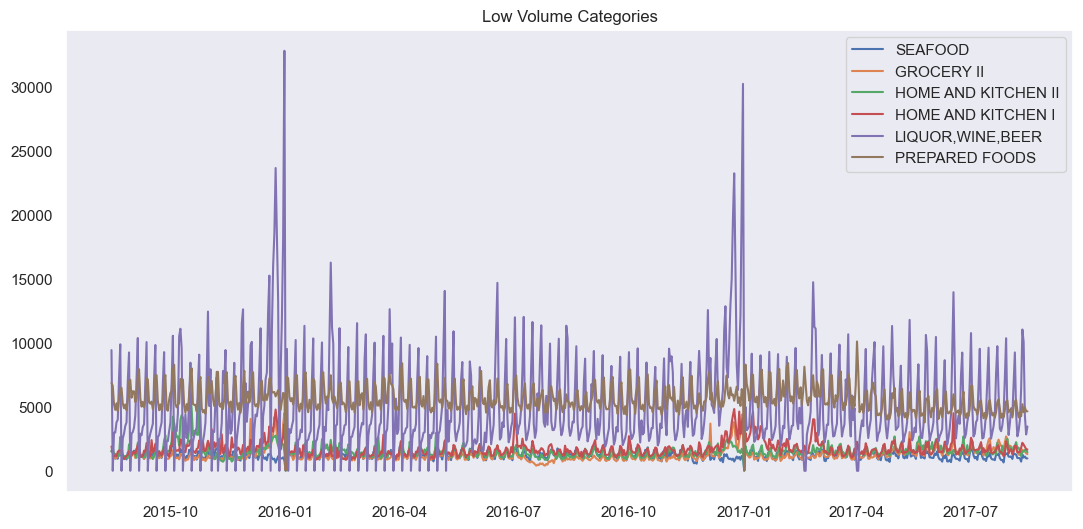

In [20]:
plt.figure(figsize=(13, 6))
plt.plot(total_sales_df[low_vol_columns])
plt.legend(low_vol_columns, loc='best')
plt.title('Low Volume Categories')
plt.show()

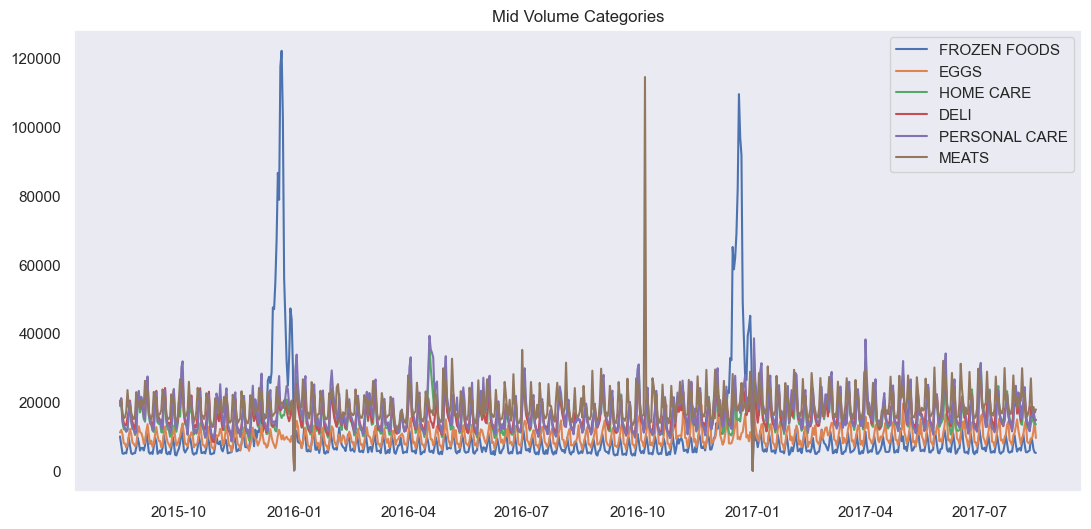

In [21]:
plt.figure(figsize=(13, 6))
plt.plot(total_sales_df[mid_vol_columns])
plt.legend(mid_vol_columns, loc='best')
plt.title('Mid Volume Categories')
plt.show()

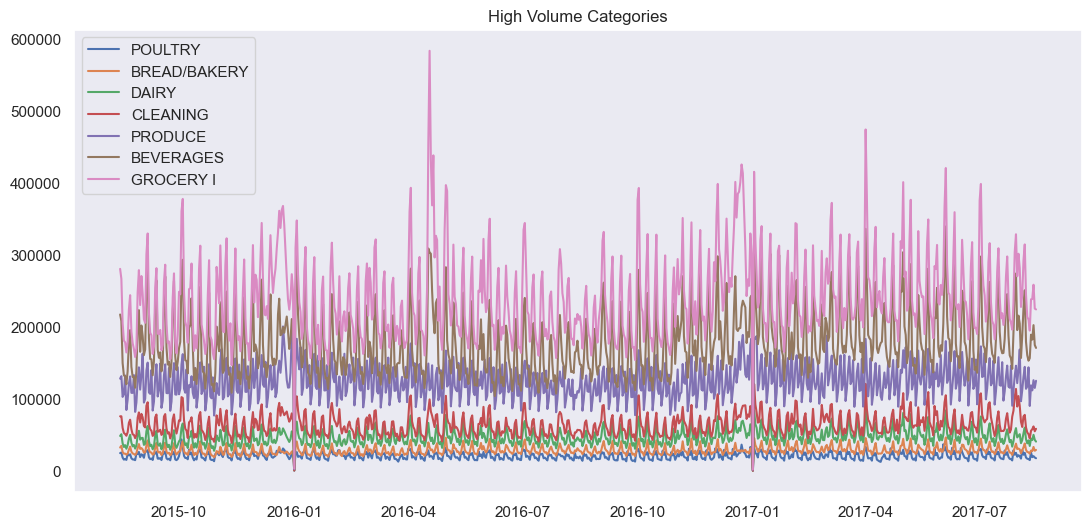

In [22]:
plt.figure(figsize=(13, 6))
plt.plot(total_sales_df[high_vol_columns])
plt.legend(high_vol_columns, loc='best')
plt.title('High Volume Categories')
plt.show()

In [23]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [24]:
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

Importing plotly failed. Interactive plots will not work.


In [25]:
changepoint_prior_scale_range = np.linspace(0.001, 0.5, num=5).tolist()
seasonality_prior_scale_range = np.linspace(0.01, 10, num=5).tolist()
holidays_prior_scale_range = np.linspace(0.01, 10, num=5).tolist()

In [26]:
ecuador_holidays = holidays.Ecuador(years=[2013])
dict(ecuador_holidays)

{datetime.date(2013, 1, 1): 'Año Nuevo',
 datetime.date(2013, 2, 11): 'Carnaval',
 datetime.date(2013, 2, 12): 'Carnaval',
 datetime.date(2013, 3, 29): 'Viernes Santo',
 datetime.date(2013, 5, 1): 'Día del Trabajo',
 datetime.date(2013, 5, 24): 'Batalla de Pichincha',
 datetime.date(2013, 8, 10): 'Primer Grito de Independencia',
 datetime.date(2013, 10, 9): 'Independencia de Guayaquil',
 datetime.date(2013, 11, 2): 'Día de los Difuntos',
 datetime.date(2013, 11, 3): 'Independencia de Cuenca',
 datetime.date(2013, 12, 25): 'Día de Navidad'}

In [ ]:
dicts = {}

for feature in total_sales_df.columns:
  
    category_df = total_sales_df[feature].copy().reset_index()
    category_df.columns = ["ds", "y"]

    category_df[["y"]] = category_df[["y"]].apply(pd.to_numeric)
    category_df["ds"] = pd.to_datetime(category_df["ds"])
    
    param_grid = {  
        "changepoint_prior_scale": changepoint_prior_scale_range,
        "seasonality_prior_scale": seasonality_prior_scale_range }
        #'holidays_prior_scale': holidays_prior_scale_range,
        #'seasonality_mode': seasonality_mode_options,
        #'changepoint_range': changepoint_range_range,

    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    mapes = [] 
    
    for params in all_params:
        try:
            m = Prophet(**params).fit(category_df)  # Fit model with given params
            df_cv = cross_validation(m, initial="365 days", period="30 days", horizon="30 days")
            df_p = performance_metrics(df_cv, rolling_window=1)
            if not df_p.empty and "mape" in df_p.columns:
                mapes.append(pd.to_numeric(df_p["mape"].values[0], errors='coerce'))
            else:
                mapes.append(np.nan)  
        except Exception as e:
            print(f"Error with params {params}: {e}")
            mapes.append(np.nan)

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results["mape"] = mapes

    params_dict = dict(tuning_results.sort_values("mape").reset_index(drop=True).iloc[0])
    params_dict["column"] = feature 
    
    dicts[feature] = params_dict

In [38]:
dicts

{'BEVERAGES': {'changepoint_prior_scale': 0.12575,
  'seasonality_prior_scale': 0.01,
  'mape': 0.2937027898604708,
  'column': 'BEVERAGES'},
 'BREAD/BAKERY': {'changepoint_prior_scale': 0.5,
  'seasonality_prior_scale': 0.01,
  'mape': 0.28579430029861047,
  'column': 'BREAD/BAKERY'},
 'CLEANING': {'changepoint_prior_scale': 0.12575,
  'seasonality_prior_scale': 0.01,
  'mape': 0.6856788860151068,
  'column': 'CLEANING'},
 'DAIRY': {'changepoint_prior_scale': 0.12575,
  'seasonality_prior_scale': 0.01,
  'mape': 0.3802309596806221,
  'column': 'DAIRY'},
 'DELI': {'changepoint_prior_scale': 0.5,
  'seasonality_prior_scale': 0.01,
  'mape': 0.4370595449173452,
  'column': 'DELI'},
 'EGGS': {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'mape': 0.46611392225418136,
  'column': 'EGGS'},
 'FROZEN FOODS': {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'mape': 0.46948192048127546,
  'column': 'FROZEN FOODS'},
 'GROCERY I': {'changepoint_prior

In [39]:
holiday = pd.DataFrame([])

ecuador_holidays = holidays.country_holidays('EC')  # this is a dict


for date_, name in sorted(holidays.EC(years=[2015,2016,2017,2018]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "EC-Holidays", 'lower_window': -2, 'upper_window': 1}, index=[0])], ignore_index=True) 

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head()

ds      holiday  lower_window  upper_window
0 2015-01-01  EC-Holidays            -2             1
1 2015-02-16  EC-Holidays            -2             1
2 2015-02-17  EC-Holidays            -2             1
3 2015-04-03  EC-Holidays            -2             1
4 2015-05-01  EC-Holidays            -2             1

Backtesting

In [40]:
prediction_days = 30
forecast_start_date = max(total_sales_df.index) - timedelta(prediction_days)

In [41]:
forecasted_dfs = []

for feature in total_sales_df.columns:
    
    #formatting
    df_copy = total_sales_df[feature].copy().reset_index()
    df_copy.columns = ['ds','y']
    df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

    df_copy['ds'] = pd.to_datetime(df_copy['ds'])
    
    df_copy_ = df_copy[df_copy['ds'] < forecast_start_date]
    
    #finding the right params_dict for this category
    params_dict = dicts[feature]
    
    #model
    m = Prophet(changepoint_prior_scale = dicts[feature]['changepoint_prior_scale'],
                seasonality_prior_scale = dicts[feature]['seasonality_prior_scale'],
                seasonality_mode = 'multiplicative',
                #changepoint_range= len(df_copy/365),
                holidays=holiday
                 )
    
    m.fit(df_copy_)

    future = m.make_future_dataframe(periods=prediction_days)
    fcst_prophet_train = m.predict(future)
    
    filter = fcst_prophet_train['ds']>=forecast_start_date 
    predicted_df = fcst_prophet_train[filter][['ds','yhat']]
    predicted_df = predicted_df.merge(df_copy)

    print(feature,mape(predicted_df['y'],predicted_df['yhat']))

00:55:34 - cmdstanpy - INFO - Chain [1] start processing
00:55:34 - cmdstanpy - INFO - Chain [1] done processing


BEVERAGES 9.836676701162533


00:55:34 - cmdstanpy - INFO - Chain [1] start processing
00:55:34 - cmdstanpy - INFO - Chain [1] done processing
00:55:35 - cmdstanpy - INFO - Chain [1] start processing
00:55:35 - cmdstanpy - INFO - Chain [1] done processing


BREAD/BAKERY 7.56200696310638
CLEANING 21.435400209076807


00:55:35 - cmdstanpy - INFO - Chain [1] start processing
00:55:35 - cmdstanpy - INFO - Chain [1] done processing
00:55:36 - cmdstanpy - INFO - Chain [1] start processing


DAIRY 14.500904675054466


00:55:36 - cmdstanpy - INFO - Chain [1] done processing
00:55:36 - cmdstanpy - INFO - Chain [1] start processing
00:55:36 - cmdstanpy - INFO - Chain [1] done processing


DELI 11.183535100781453


00:55:37 - cmdstanpy - INFO - Chain [1] start processing


EGGS 12.632595345377801


00:55:37 - cmdstanpy - INFO - Chain [1] done processing
00:55:37 - cmdstanpy - INFO - Chain [1] start processing


FROZEN FOODS 48.3941714154867


00:55:37 - cmdstanpy - INFO - Chain [1] done processing


GROCERY I 11.328080696296169


00:55:38 - cmdstanpy - INFO - Chain [1] start processing
00:55:38 - cmdstanpy - INFO - Chain [1] done processing


GROCERY II 21.564877801954598


00:55:39 - cmdstanpy - INFO - Chain [1] start processing
00:55:39 - cmdstanpy - INFO - Chain [1] done processing


HOME AND KITCHEN I 14.940912450243529


00:55:39 - cmdstanpy - INFO - Chain [1] start processing
00:55:39 - cmdstanpy - INFO - Chain [1] done processing


HOME AND KITCHEN II 15.132426866645973


00:55:40 - cmdstanpy - INFO - Chain [1] start processing
00:55:40 - cmdstanpy - INFO - Chain [1] done processing


HOME CARE 15.2085378242177


00:55:41 - cmdstanpy - INFO - Chain [1] start processing
00:55:41 - cmdstanpy - INFO - Chain [1] done processing


LIQUOR,WINE,BEER 31.088168686035182


00:55:41 - cmdstanpy - INFO - Chain [1] start processing
00:55:41 - cmdstanpy - INFO - Chain [1] done processing


MEATS 7.7902478070136825


00:55:42 - cmdstanpy - INFO - Chain [1] start processing
00:55:42 - cmdstanpy - INFO - Chain [1] done processing


PERSONAL CARE 17.078081288516366


00:55:42 - cmdstanpy - INFO - Chain [1] start processing
00:55:43 - cmdstanpy - INFO - Chain [1] done processing


POULTRY 11.478308475227426


00:55:43 - cmdstanpy - INFO - Chain [1] start processing
00:55:43 - cmdstanpy - INFO - Chain [1] done processing


PREPARED FOODS 8.13918886621822


00:55:44 - cmdstanpy - INFO - Chain [1] start processing
00:55:44 - cmdstanpy - INFO - Chain [1] done processing


PRODUCE 8.515622178476319


00:55:45 - cmdstanpy - INFO - Chain [1] start processing
00:55:45 - cmdstanpy - INFO - Chain [1] done processing


SEAFOOD 11.472937123028695


Final Predictions

In [36]:
prediction_days = 30
forecast_start_date = max(total_sales_df.index)

00:56:26 - cmdstanpy - INFO - Chain [1] start processing
00:56:26 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
c:\Users\karat\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this wi

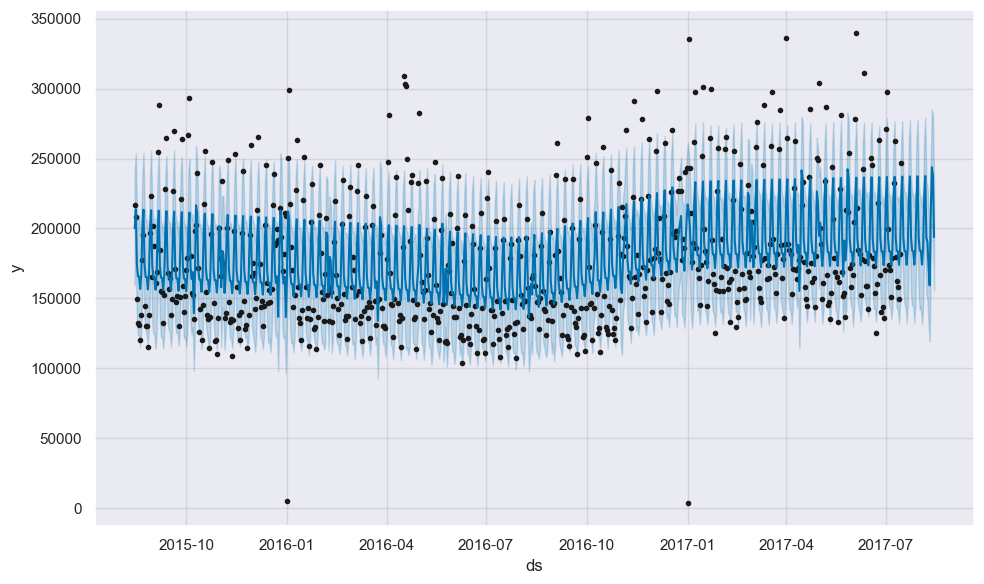

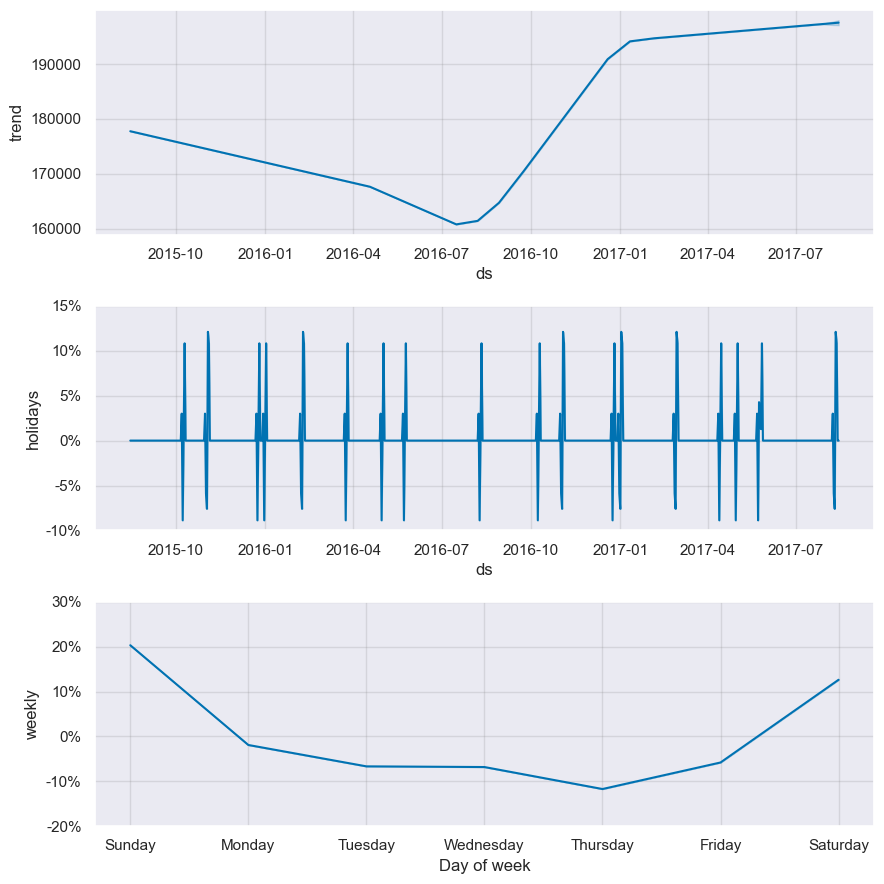

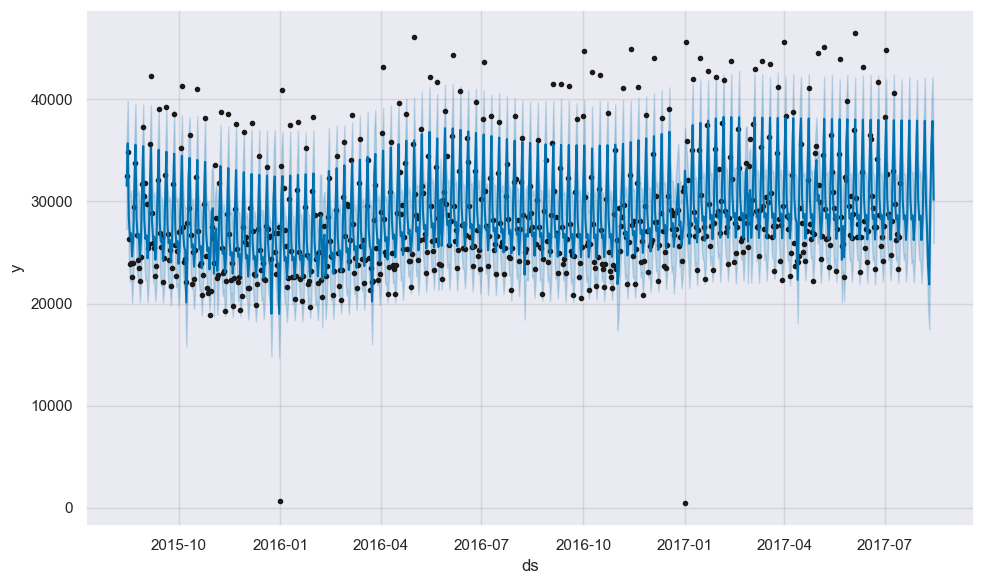

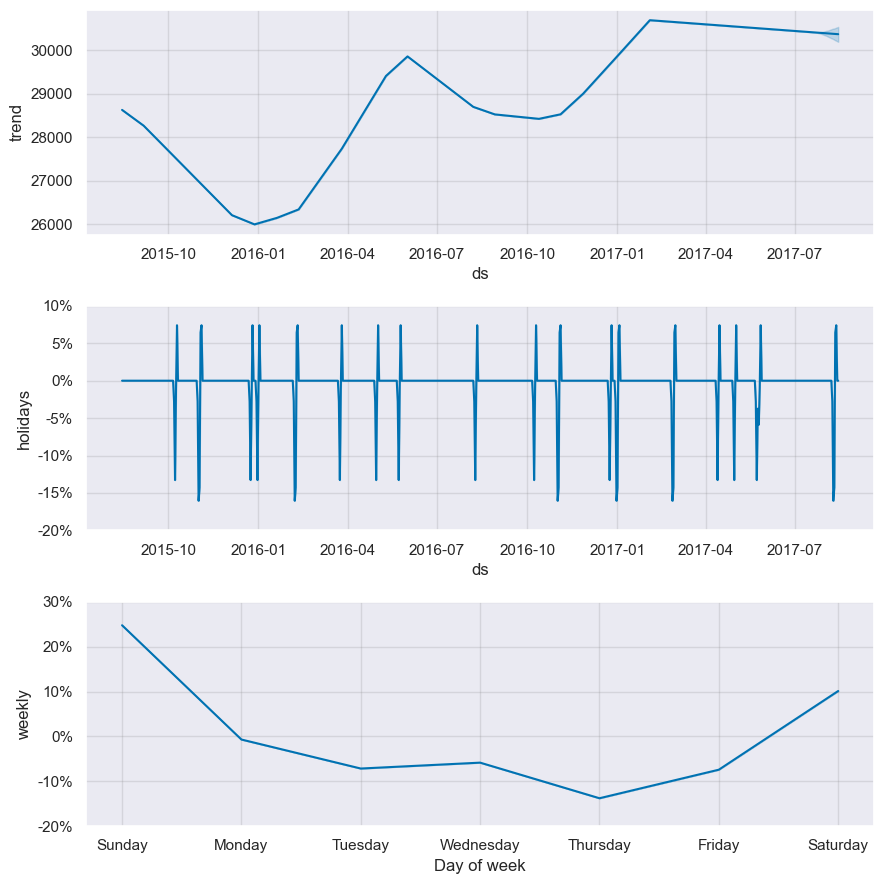

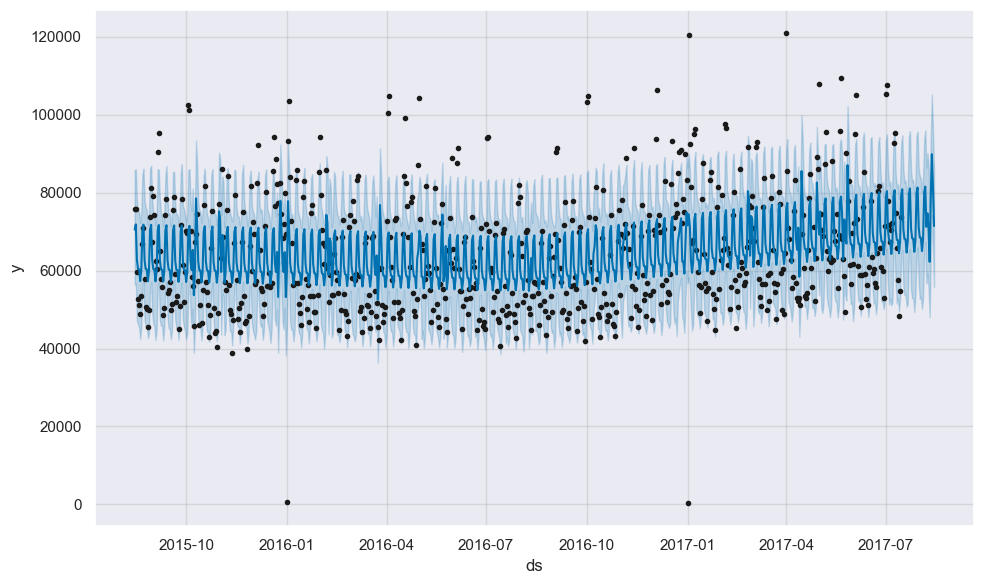

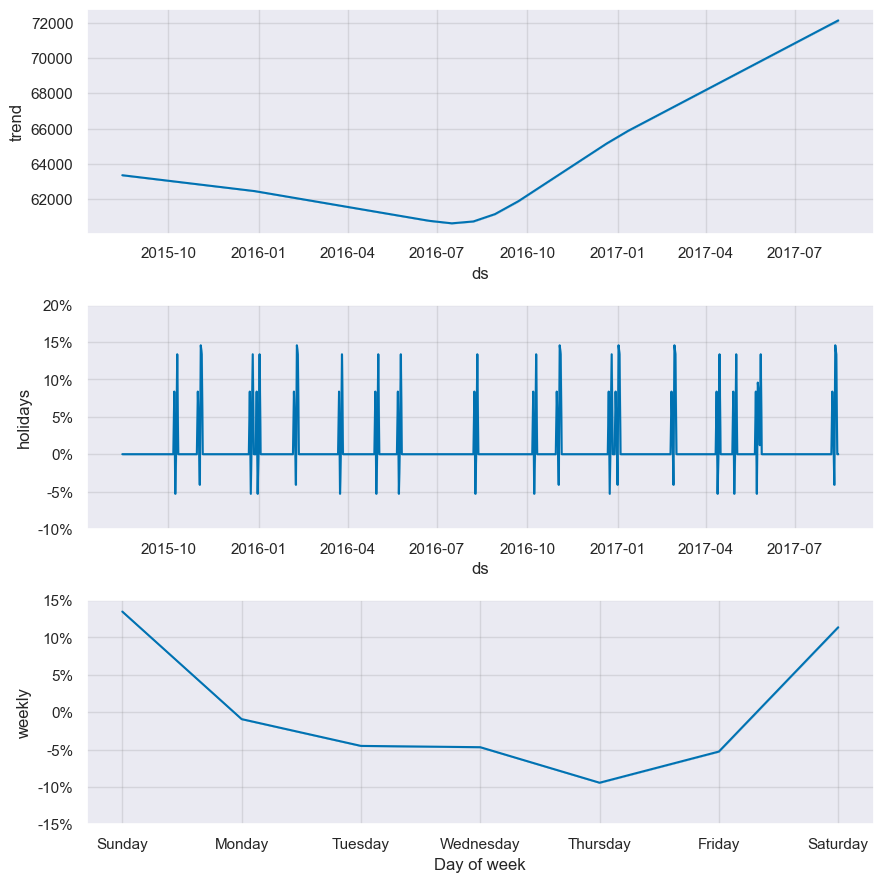

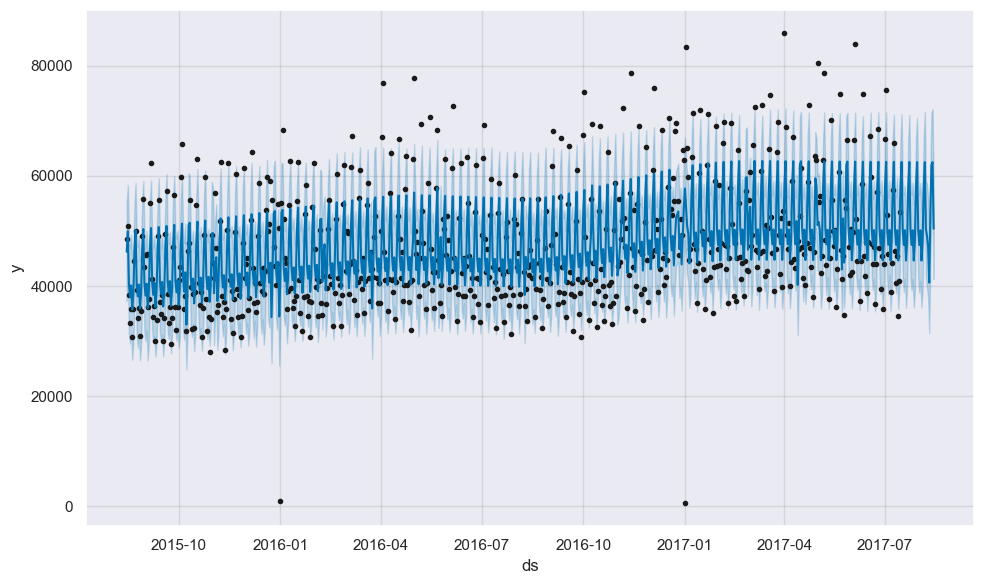

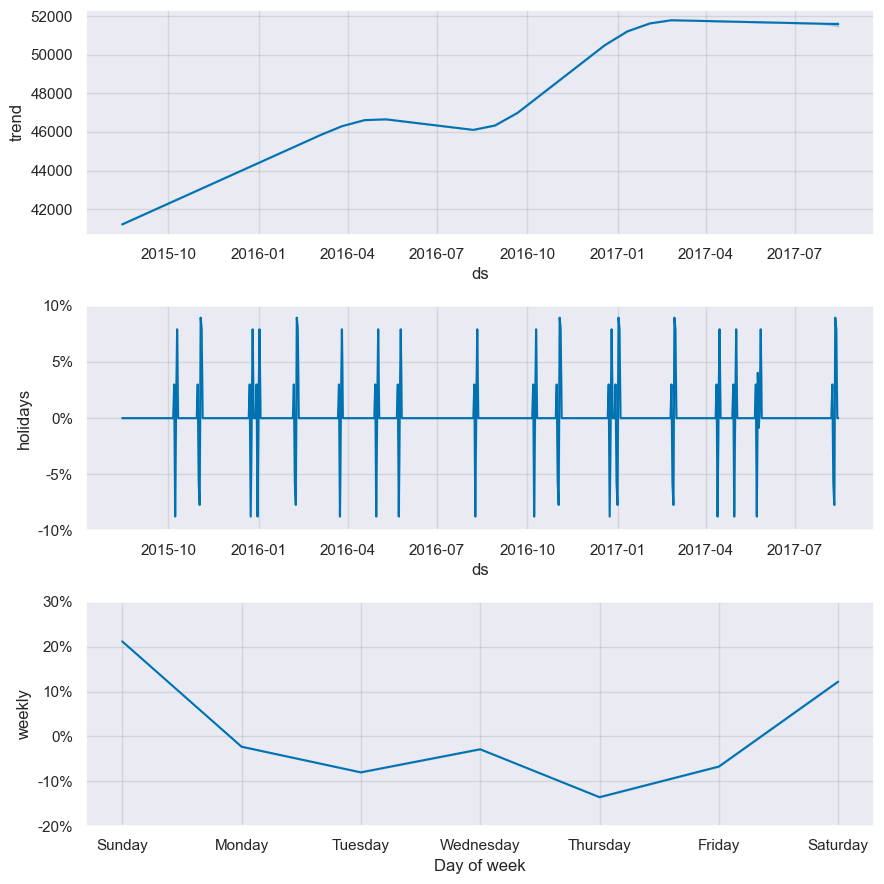

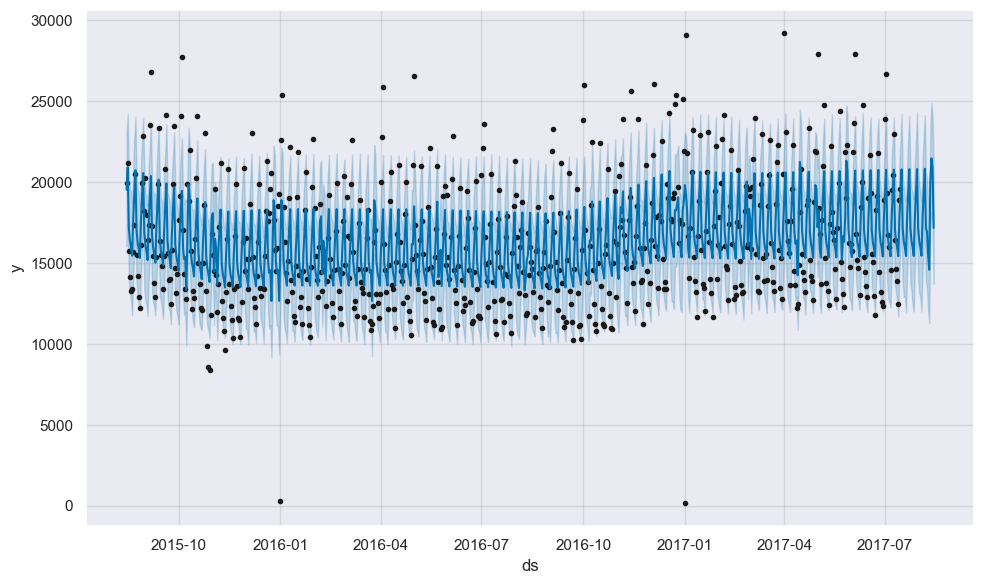

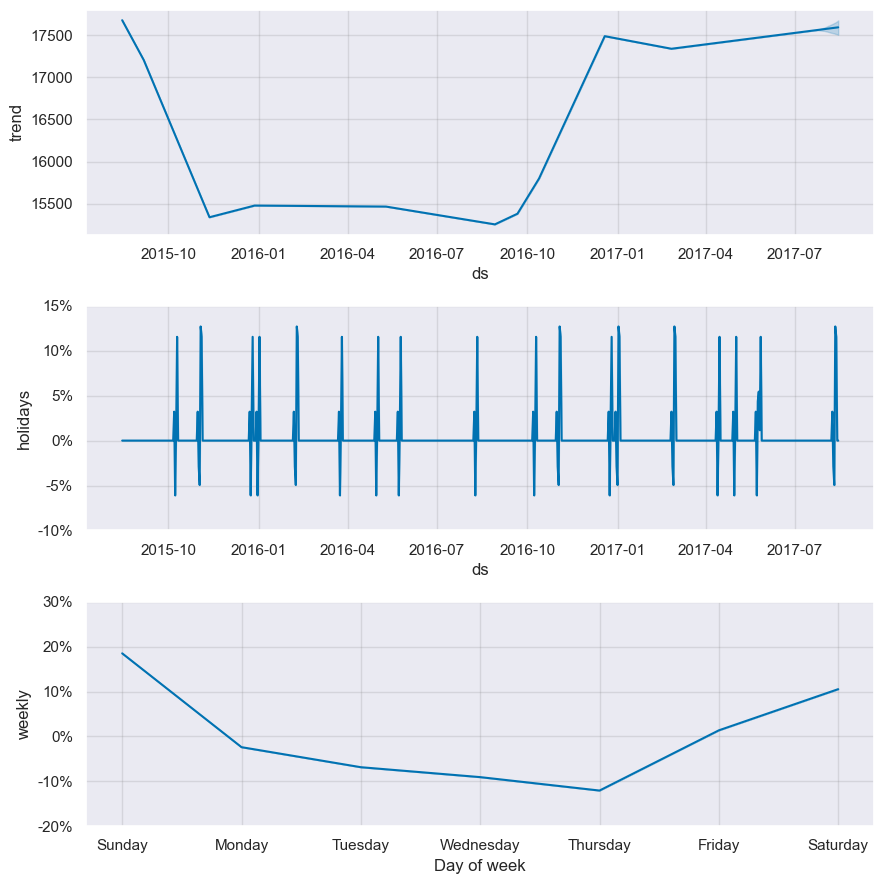

In [42]:
forecasted_dfs = []

for feature in total_sales_df.columns[:5]:
    
    #formatting
    df_copy = total_sales_df[feature].copy().reset_index()
    df_copy.columns = ['ds','y']
    df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

    df_copy['ds'] = pd.to_datetime(df_copy['ds'])
    
    df_copy_ = df_copy[df_copy['ds'] < forecast_start_date]
    
    #finding the right params_dict for this category
    params_dict = dicts[feature]
    
    #model
    m = Prophet(changepoint_prior_scale = dicts[feature]['changepoint_prior_scale'],
                seasonality_prior_scale = dicts[feature]['seasonality_prior_scale'],
                seasonality_mode = 'multiplicative',
                holidays=holiday
                 )
    
    m.fit(df_copy_)

    future = m.make_future_dataframe(periods=prediction_days)
    fcst_prophet_train = m.predict(future)
    
    fig1 = m.plot(fcst_prophet_train)
    fig2 = m.plot_components(fcst_prophet_train)

    forecasted_df = fcst_prophet_train[fcst_prophet_train['ds']>=forecast_start_date]
    
    forecasted_dfs.append(forecasted_df)